# ICS352 Cougar Group  Project: Loan Eligibility Predictors

# **1.** **Dataset**

In [1]:
# Import libraires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the datasets from CSV files
loan_train = pd.read_csv("/content/drive/MyDrive/loan-train.csv")
loan_test = pd.read_csv("/content/drive/MyDrive/loan-test.csv")


In [4]:
# Display some information of loan_train dataset
display(loan_train.head())
display(loan_train.head())
display(loan_train.info())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


None

In [5]:
# Display some information of loan_test dataset
display(loan_test.head())
display(loan_test.info())

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


None

We can see there are three formats of loan_train data types from the code below:
*   object: Object format means variables are categorical. Categorical variables in our dataset are Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status.
*   int64: It represents the integer variables. ApplicantIncome is of this format.
*   float64: It represents the variable that has some decimal values involved. They are also numerical

\







In [6]:
loan_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We have 614 rows and 13 columns in the loan_train dataset from the code below.



In [7]:
# Get the shape(Rows, Columns) of the loan_train dataset
print("Shape : ", loan_train.shape)

Shape :  (614, 13)


We have 367 rows and 12 columns in loan_test dataset from the code below:



In [8]:
# Get the shape(Rows, Columns) of the loan_test dataset
print("Shape : ", loan_test.shape)

Shape :  (367, 12)


In [9]:
# Understand some important information from the loan_test dataset
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
# Understand some important information from the loan_test dataset
loan_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [11]:
# Duplicated data
loan_train[loan_train.duplicated() == True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


 ## **1.1** Missing  Values





In [12]:
loan_train.isnull().values.any()

True

In [13]:
# Find missing value of loan_train dataset
loan_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(loan_train)

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [15]:
# Import libraries
import missingno as msno
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Define a custom color palette with 12 distinct colors
custom_colors = sns.color_palette("tab20", n_colors=12)

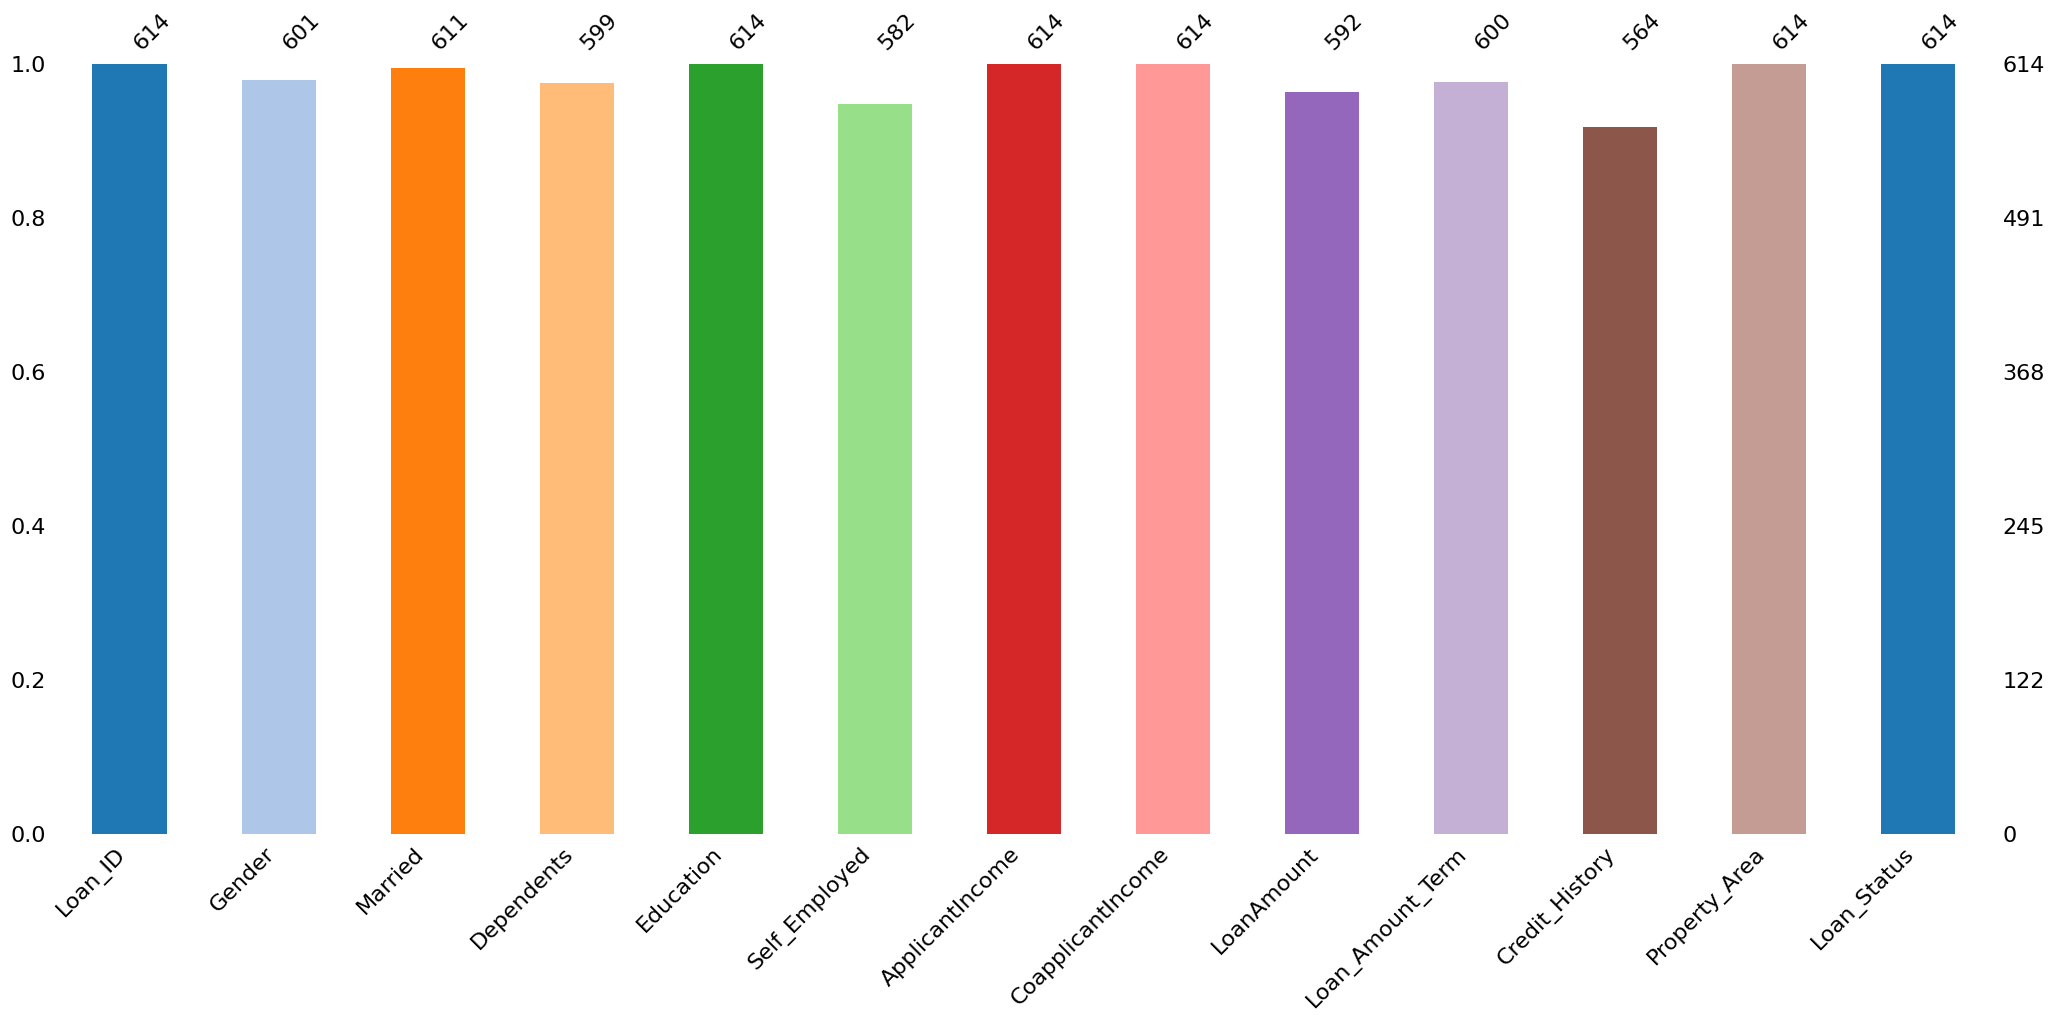

In [17]:
# Create the missing value bar chart with the custom color palette
msno.bar(loan_train, color=custom_colors)
plt.show()

 ## **1.2** Dealing with Missing Values

From the loan_train dataset, there are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.

Methods to fill the missing values:
* **Numerical Variables**: Imputation using mean or median
* **Categorical Variables**: Imputation using mode </n>

Use the mode of the features to fill missing values in Gender, Married, Dependents, Credit_History, and Self_Employed features.






In [18]:
loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0], inplace=True)
loan_train['Credit_History'].fillna(0, inplace=True)

From the output of Loan_Amount_Term below, it can be seen that in the loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.



In [19]:
loan_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [20]:
loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0], inplace=True)

In [21]:
loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].median(), inplace=True)

In [22]:
loan_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# **2.** **Data Visualization and Exploration**

In [23]:
loan_train_clean = loan_train.copy()

In [24]:
# List all columns of loan_train dataset
loan_train_clean.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
grouped_loan_status = loan_train_clean.groupby('Loan_Status')['Loan_Status'].count()
# Count of 'Y' (Yes) and 'N' (No)
yes_count = grouped_loan_status['Y']
no_count = grouped_loan_status['N']

print("Loan was Approved:", yes_count)
print ("Loan was Rejected:", no_count)

Loan was Approved: 422
Loan was Rejected: 192


In [26]:
loan_train_clean['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

From the chart below, the loan of 332(around 69%) people out of 480 were approved.

<Axes: >

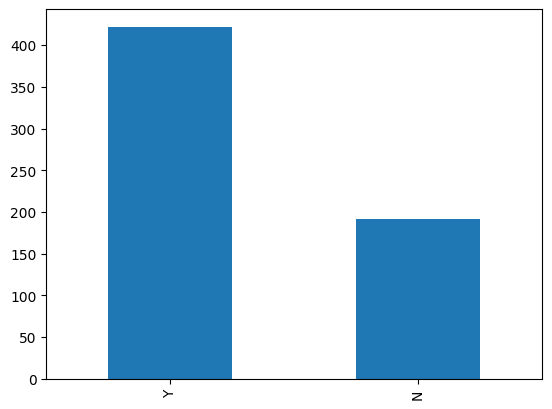

In [27]:
loan_train_clean['Loan_Status'].value_counts().plot.bar()

## **2.1** Independent Variable (Categorical)


From the bar plots below, it can be inferred that:
* 80% of applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* Around 15% of applicants in the dataset are self-employed.
* Around 85% of applicants have repaid their doubts.


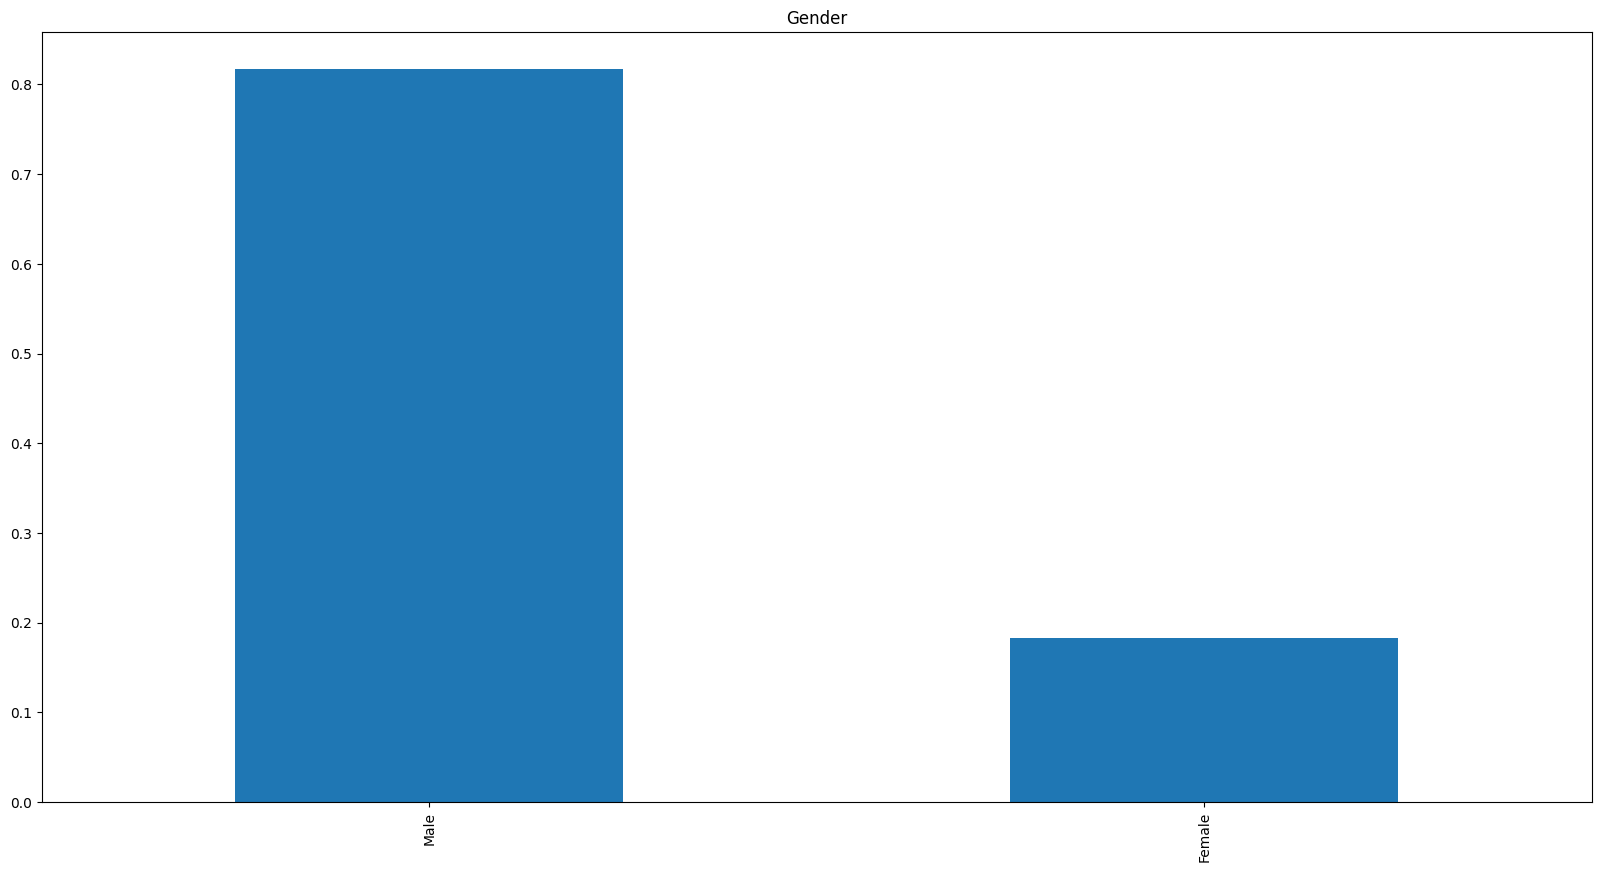

In [28]:
loan_train_clean['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.show()

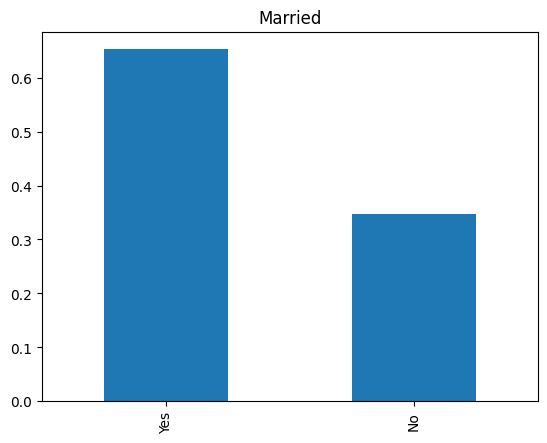

In [29]:
loan_train_clean['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()

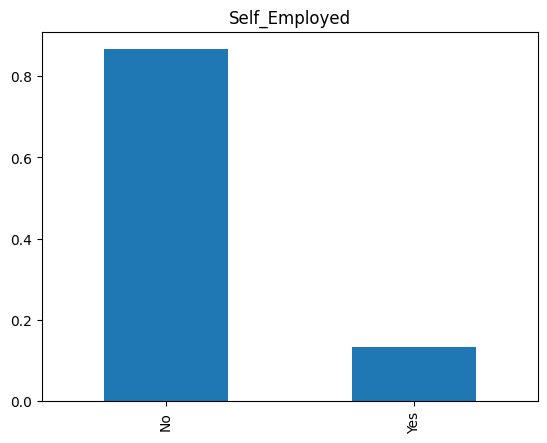

In [30]:
loan_train_clean['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()

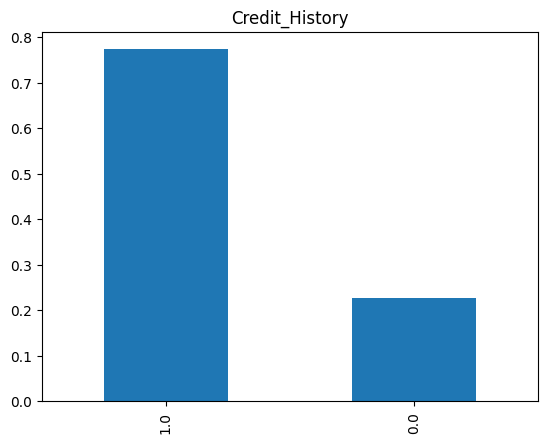

In [31]:
loan_train_clean['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

## **2.2** Independent Variable (Ordinal)


From the bar plots below, it can be inferred that:
* Most of the applicants don't have any dependents.
* Around 80% of the applicants are Graduate.
* Most of the applicants are from the Semiurban area.

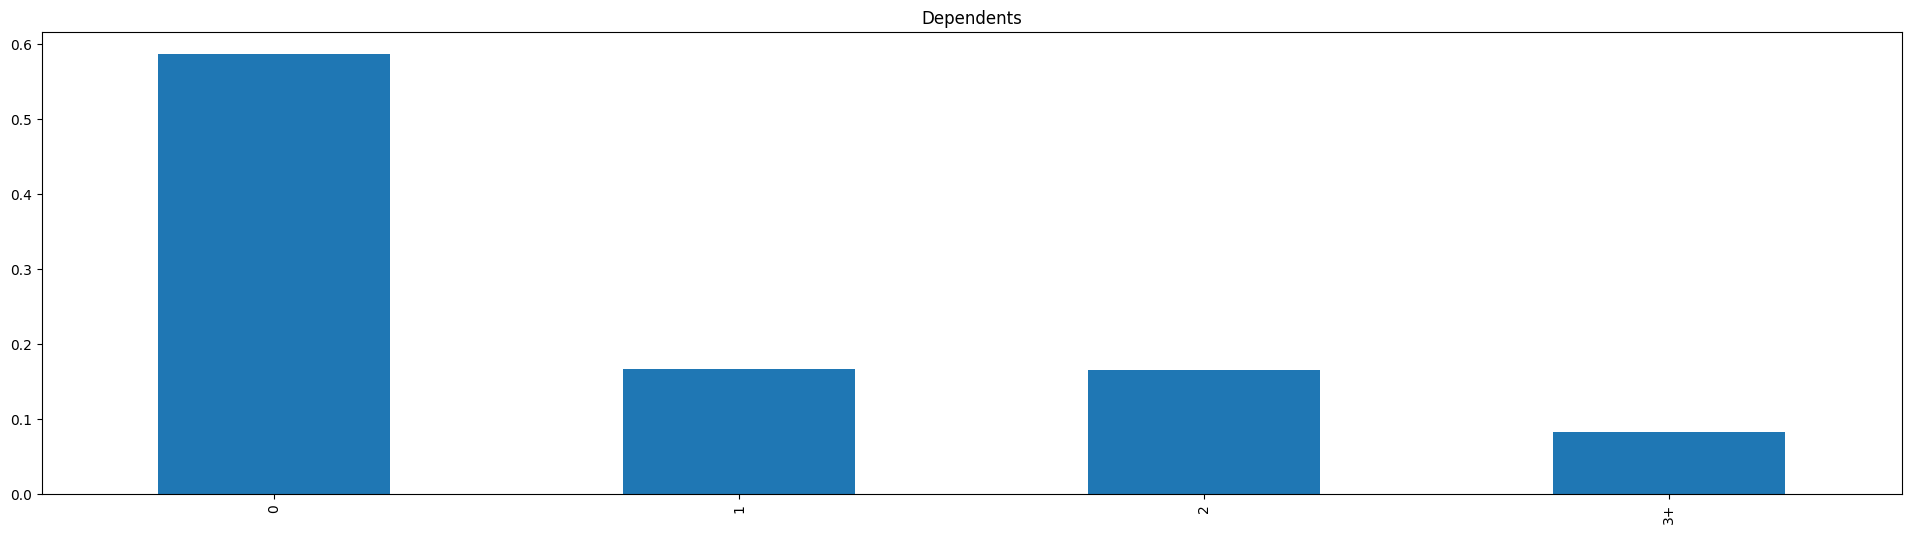

In [32]:
loan_train_clean['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.show()

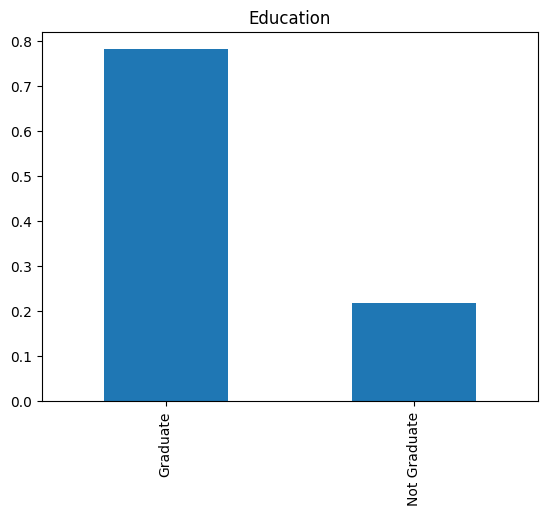

In [33]:
loan_train_clean['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()

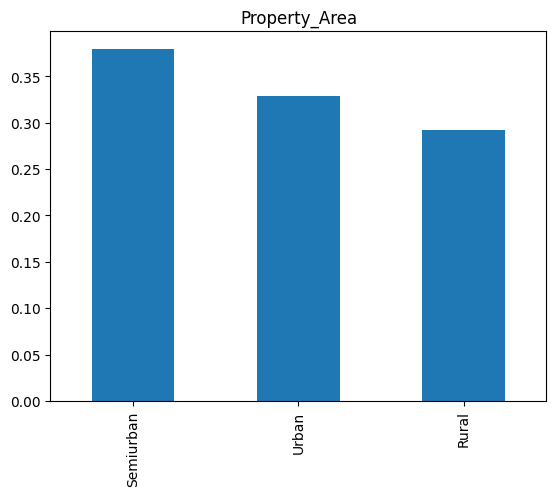

In [34]:
loan_train_clean['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

## **2.3** Independent Variable (Numerical)

The chart below can be inferred that most of the data in the distribution of applicant income are towards the left which means it is not normally distributed. We will try to make it normal in later sections as algorithms work better if the data is normally distributed.



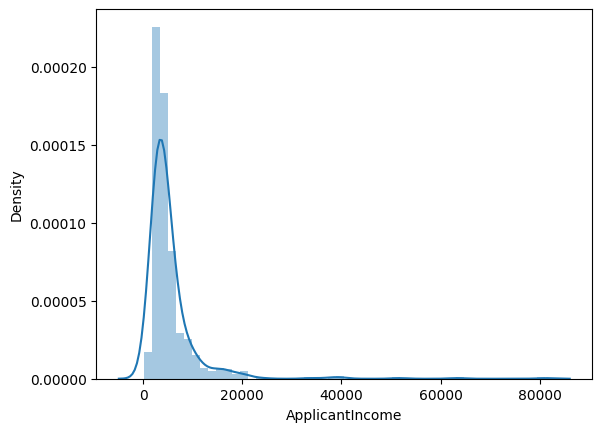

In [35]:
sns.distplot(loan_train_clean['ApplicantIncome'])
plt.show()

The boxplot below confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education.



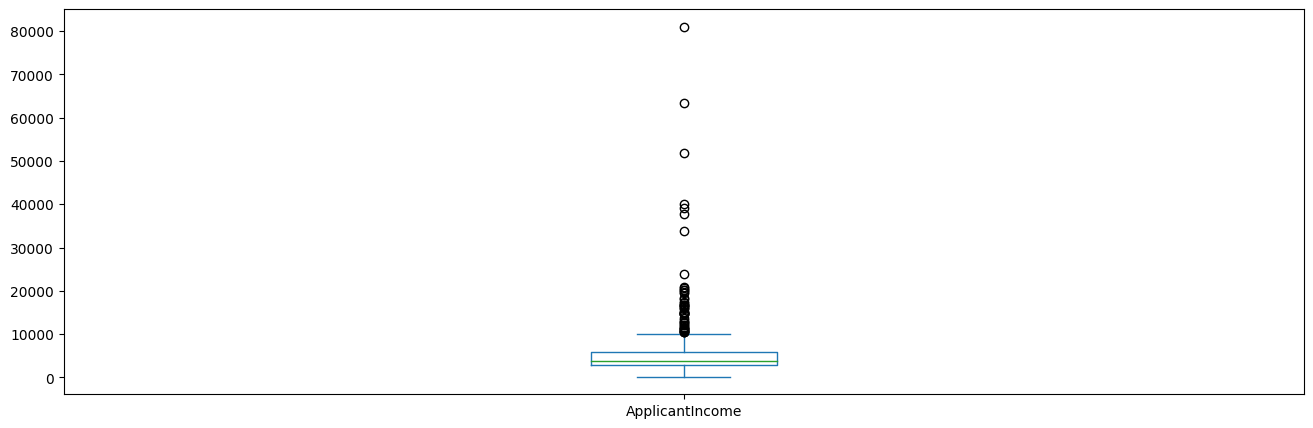

In [36]:
loan_train_clean['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()


The boxplot below reveals that there is a higher number of graduates with very high incomes, which appear to be outliers.

Text(0.5, 0.98, ' ')

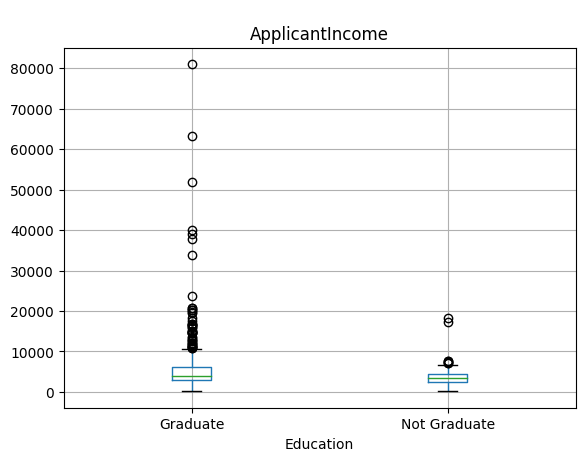

In [37]:
loan_train_clean.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle(" ")


Looking at the Co-applicant income distribution in the charts below, there is a similar distribution to that of the applicant's income. The majority of co-applicants income ranges from 0 to 5000. We also see a lot of outliers in the applicant's income and it is not normally distributed.



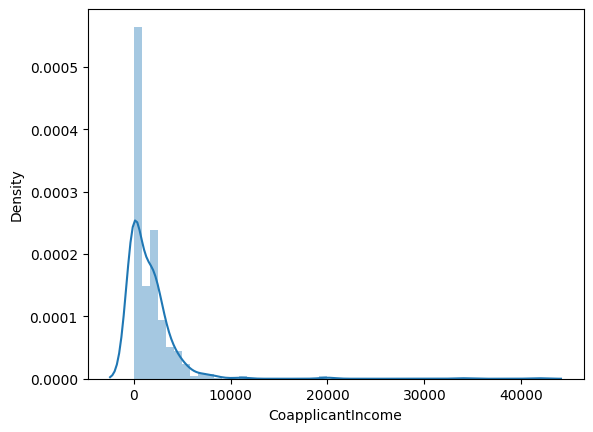

In [38]:
sns.distplot(loan_train_clean['CoapplicantIncome'])
plt.show()

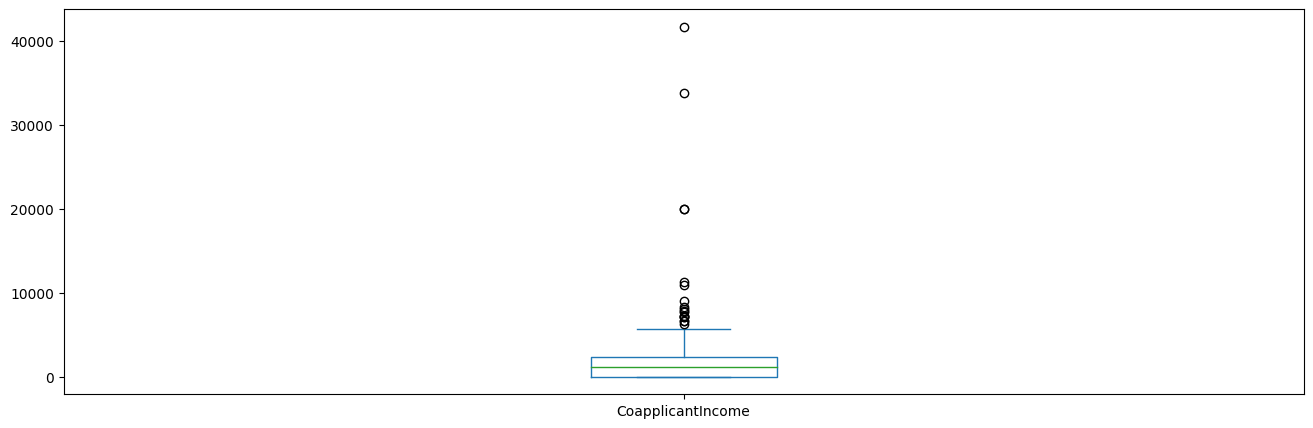

In [39]:
loan_train_clean['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Looking at the charts below, there are a lot of outliers in this variable and the distribution is fairly normal.

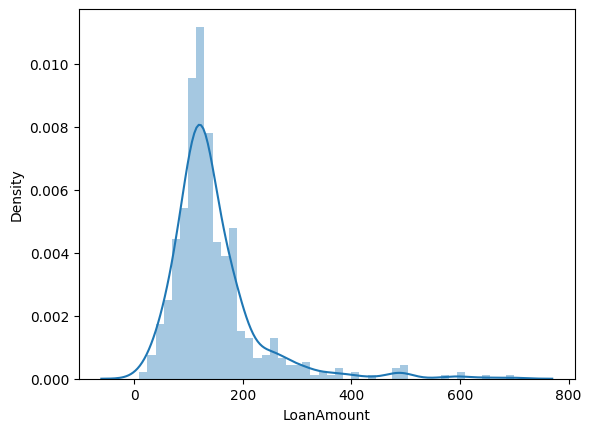

In [40]:
loan_train_clean.notna()
sns.distplot(loan_train_clean['LoanAmount'])
plt.show()

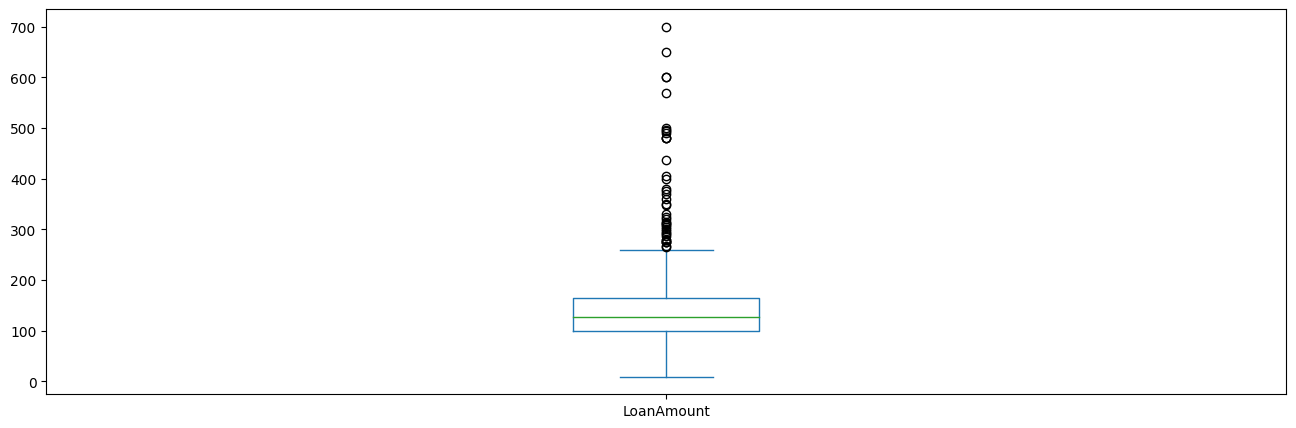

In [41]:
loan_train_clean['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

## **2.4** Bivariate Analysis

### **2.4.1** Categorical Independent Variable vs. Target Variable

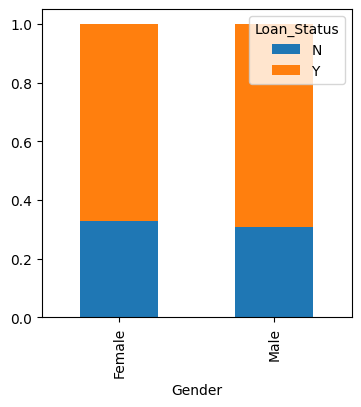

In [42]:
Gender=pd.crosstab(loan_train_clean['Gender'],loan_train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind= "bar",stacked=True,figsize=(4,4))
plt.show()

Based on the plot above, the proportion of male and female applicants is more or less the same for both approved and unapproved loans.



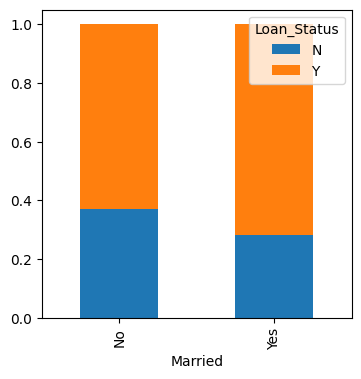

In [43]:
Married=pd.crosstab(loan_train_clean['Married'],loan_train_clean['Loan_Status'])
Dependents=pd.crosstab(loan_train_clean['Dependents'],loan_train_clean['Loan_Status'])
Education=pd.crosstab(loan_train_clean['Education'],loan_train_clean['Loan_Status'])
Self_Employed=pd.crosstab(loan_train_clean['Self_Employed'],loan_train_clean['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind= "bar",stacked=True,figsize=(4,4))
plt.show()

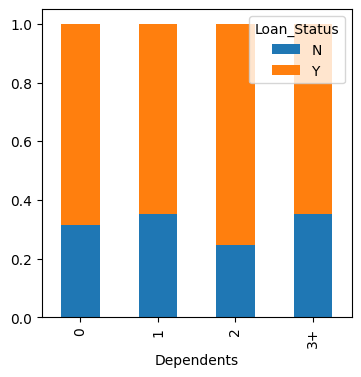

In [44]:
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

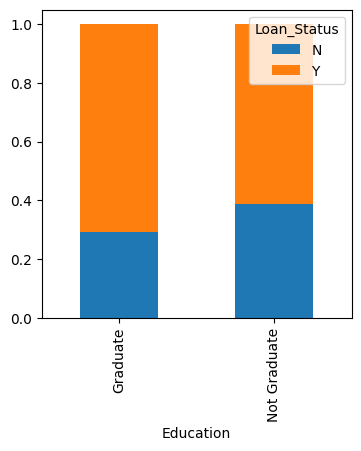

In [45]:
Education.div(Education.sum(1).astype(float), axis=0).plot(kind= "bar",stacked=True,figsize=(4,4))
plt.show()

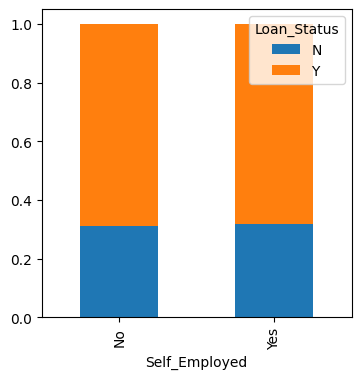

In [46]:
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

Based on the plots above, we can see that:
*   The proportion of married applicants is higher for approved loans
*   Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
* There is nothing significant we can see from the Self_Employed vs Loan_Status plot.




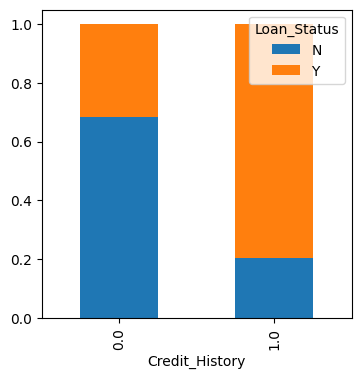

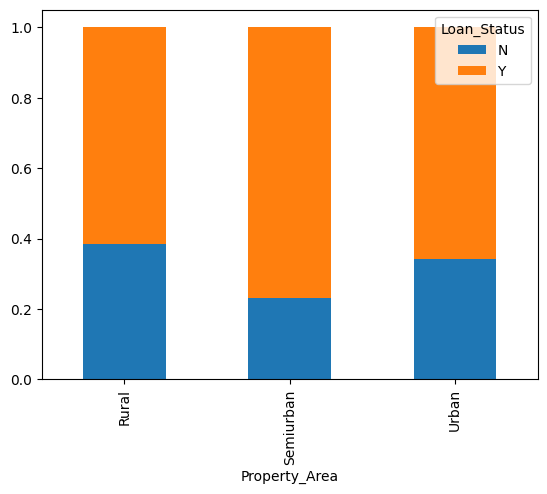

In [47]:
Credit_History=pd.crosstab(loan_train_clean['Credit_History'],loan_train_clean['Loan_Status'])
Property_Area=pd.crosstab(loan_train_clean['Property_Area'],loan_train_clean['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind= "bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind= "bar",stacked=True)
plt.show()

Based on the bar plots above, we can see that:
*  It seems people with a credit history as 1 are more likely to get their loans approved.
* The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.


### **2.4.1** Numerical Independent Variable vs. Target Variable

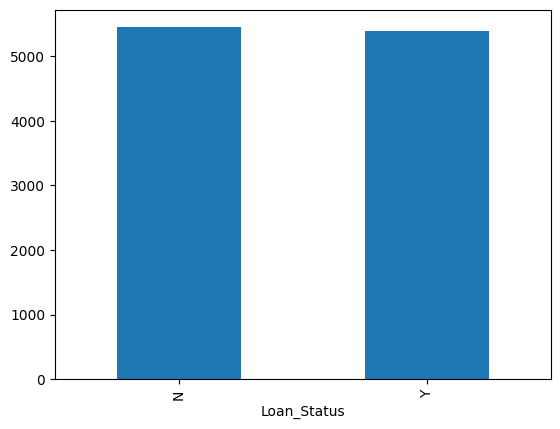

In [48]:
loan_train_clean.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

Based on the bar plot above, we don’t see any change in the mean income.

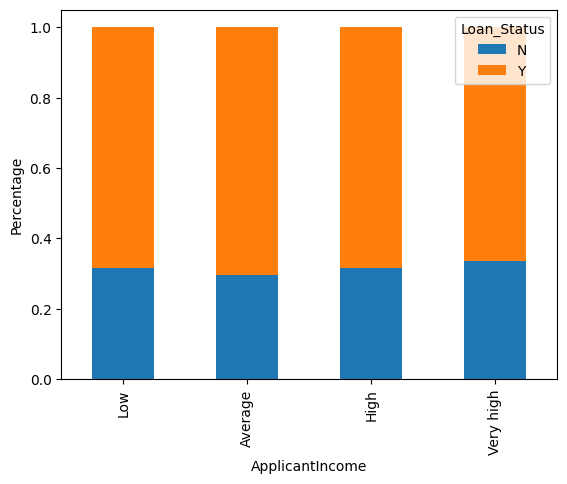

In [49]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
loan_train_clean['Income_bin']=pd.cut(loan_train_clean['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(loan_train_clean['Income_bin'],loan_train_clean['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind= "bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

Based on the bar plot above, we can be inferred that the Applicant's income does not affect the chances of loan approval which contradicts

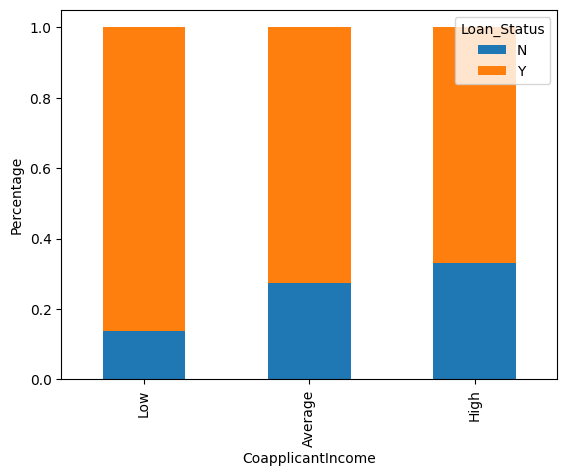

In [50]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
loan_train_clean['Coapplicant_Income_bin']=pd.cut(loan_train_clean['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(loan_train_clean['Coapplicant_Income_bin'],loan_train_clean['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind= "bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

Based on the plot above, it shows that the co-applicants' income is less the chances of loan approval are high. But this does not look right. We combine the Applicant Income and Co-applicant Income and see the combined effect of Total Income on the Loan_Status.

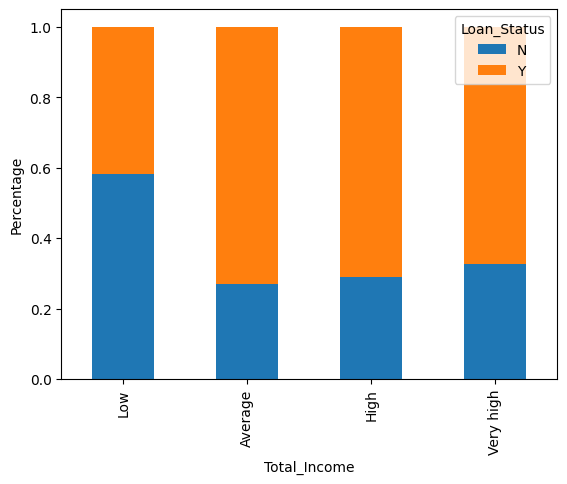

In [51]:
loan_train_clean['Total_Income']= loan_train_clean['ApplicantIncome']+loan_train_clean['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
loan_train_clean['Total_Income_bin']=pd.cut(loan_train_clean['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(loan_train_clean['Total_Income_bin'],loan_train_clean['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

Based on the plot above, we can see that Proportion of loans getting approved for applicants having low Total_Income is very less compared to that of applicants with Average, High & Very High Income.



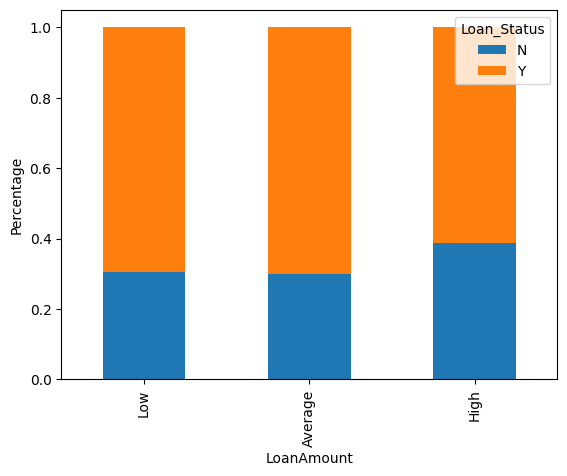

In [52]:
bins=[0,100,200,700]
group=['Low','Average','High']
loan_train_clean['LoanAmount_bin']=pd.cut(loan_train_clean['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(loan_train_clean['LoanAmount_bin'],loan_train_clean['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind= "bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

Based on the plot above, we can see that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.



# **3.** **Data Preprocessing**

## **3.1** Data Transfermation

* Change the 3+ in dependents variable to 3 to make it a numerical variable.
* Convert the target variable’s categories into 0 and 1, so that we can find its correlation with numerical variables by replacing N with 0 and Y with 1


In [53]:
loan_train_clean1 =loan_train_clean.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [54]:
loan_train_clean1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [55]:
loan_train_clean1.shape

(614, 13)

In [56]:
Gender_map= {'Male':0,'Female':1}
Married_map= {'Yes':1,'No':0}
Education_map= {'Graduate':1,'Not Graduate':0}
Self_Employed_map= {'Yes':1,'No':0}
Dependents_map= {'0':0,'1':1,'2':2,'3+':3}
Loan_Status_map= {'Y':1,'N':0}
Rural_map={'Rural':1,'Urban':0,'Semiurban':0}
Urban_map={'Rural':0,'Urban':1,'Semiurban':0}
Semiurban_map={'Rural':0,'Urban':0,'Semiurban':1}

In [57]:
loan_train_clean1["Gender"]= loan_train_clean1["Gender"].map(Gender_map)
loan_train_clean1["Married"]= loan_train_clean1["Married"].map(Married_map)
loan_train_clean1["Education"]= loan_train_clean1["Education"].map(Education_map)
loan_train_clean1["Dependents"]= loan_train_clean1["Dependents"].map(Dependents_map)
loan_train_clean1["Self_Employed"]= loan_train_clean1["Self_Employed"].map(Self_Employed_map)
loan_train_clean1["Loan_Status"]= loan_train_clean1["Loan_Status"].map(Loan_Status_map)
loan_train_clean1["Rural_Area"]= loan_train_clean1["Property_Area"].map(Rural_map)
loan_train_clean1["Urban_Area"]= loan_train_clean1["Property_Area"].map(Urban_map)
loan_train_clean1["Semiurban_Area"]= loan_train_clean1["Property_Area"].map(Semiurban_map)

In [58]:
loan_train_clean1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rural_Area,Urban_Area,Semiurban_Area
0,LP001002,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1,0,1,0
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0,1,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1,0,1,0
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1,0,1,0
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1,1,0,0
610,LP002979,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,Rural,1,1,0,0
611,LP002983,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1,0,1,0
612,LP002984,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,1,0,1,0


In [59]:
loan_train_clean1.shape

(614, 16)

## **3.2** Correlation Between All the Numerical Variables

In [60]:
df_CM_train = loan_train_clean1.copy()

In [61]:
df_CM_train['Loan_Status1']=df_CM_train['Loan_Status']
df_CM_train.drop(['Loan_Status'],inplace=True,axis=1)

In [62]:
df_CM_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Rural_Area,Urban_Area,Semiurban_Area,Loan_Status1
0,LP001002,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,0,1,0,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,1,0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,0,1,0,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,0,1,0,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1,0,0,1
610,LP002979,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,Rural,1,0,0,1
611,LP002983,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,0,1,0,1
612,LP002984,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,0,1,0,1


In [63]:
df_CM_train.drop(['Loan_ID'],inplace=True,axis=1)
df_CM_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Rural_Area,Urban_Area,Semiurban_Area,Loan_Status1
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,0,1,0,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,1,0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,0,1,0,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,0,1,0,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1,0,0,1
610,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,Rural,1,0,0,1
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,0,1,0,1
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,0,1,0,1


Correlation Matrix


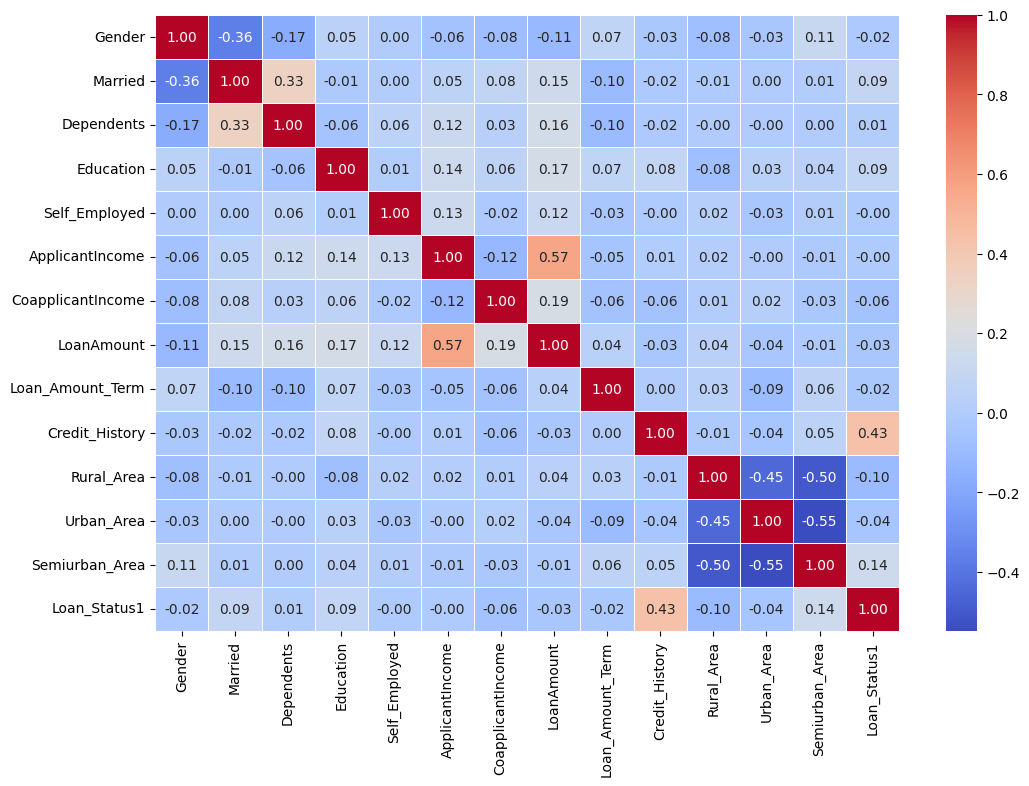

In [64]:
print("Correlation Matrix")
plt.rcParams['figure.figsize']=(12,8)
sns.heatmap(df_CM_train.corr(),cmap='coolwarm',linewidths=.5,fmt=".2f",annot = True);

## **3.4** Drop Unecessary Variables

In [65]:
df_ml_train = df_CM_train.copy()

In [66]:
df_ml_train.drop(['Property_Area'],inplace=True,axis=1)
df_ml_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural_Area,Urban_Area,Semiurban_Area,Loan_Status1
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,0,1,0,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1,0,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1,0,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1,0,1


In [67]:
df_ml_train.shape

(614, 14)

## **3.3** Dealing withOutliers

In [68]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [69]:
df_out = df_ml_train.copy()
clf.fit_predict(df_out)
df_scores = clf.negative_outlier_factor_

In [70]:
np.sort(df_scores)[0:70]

array([-10.19894597,  -9.88868638,  -8.01887617,  -7.23878366,
        -5.76079954,  -4.67049807,  -4.65694359,  -4.3808657 ,
        -4.37788191,  -4.1150077 ,  -3.57822717,  -2.8268916 ,
        -2.80252482,  -2.4953153 ,  -2.2983655 ,  -2.22518166,
        -2.08269847,  -2.0767137 ,  -2.06656857,  -2.04769721,
        -2.04569056,  -2.04414639,  -2.01169067,  -1.97269508,
        -1.97265236,  -1.95503262,  -1.92890822,  -1.92224759,
        -1.89303834,  -1.8816223 ,  -1.86568478,  -1.86489828,
        -1.8535721 ,  -1.85242055,  -1.78692325,  -1.77476636,
        -1.7705988 ,  -1.77019909,  -1.73842812,  -1.71791352,
        -1.69117879,  -1.63874504,  -1.63300371,  -1.61930522,
        -1.60527633,  -1.59377929,  -1.58375668,  -1.58265605,
        -1.58226512,  -1.55188788,  -1.54013962,  -1.52055508,
        -1.52002374,  -1.49854986,  -1.49471774,  -1.49009722,
        -1.48896024,  -1.48855913,  -1.48777913,  -1.47657819,
        -1.46780393,  -1.46568883,  -1.43056667,  -1.42

In [71]:
threshold_value = np.sort(df_scores)[14]
threshold_value

-2.298365498075209

In [72]:
Outlier_df= df_out[df_scores < threshold_value]
indexs=Outlier_df.index
Outlier_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural_Area,Urban_Area,Semiurban_Area,Loan_Status1
9,0,1,1,1,0,12841,10968.0,349.0,360.0,1.0,0,0,1,0
155,0,1,3,1,0,39999,0.0,600.0,180.0,0.0,0,0,1,1
171,0,1,3,1,0,51763,0.0,700.0,300.0,1.0,0,1,0,1
183,0,1,1,1,0,33846,0.0,260.0,360.0,1.0,0,0,1,0
185,0,1,0,1,1,39147,4750.0,120.0,360.0,1.0,0,0,1,1
216,0,1,0,1,0,150,1800.0,135.0,360.0,1.0,1,0,0,0
333,0,1,0,1,0,63337,0.0,490.0,180.0,1.0,0,1,0,1
402,0,0,0,1,0,2500,20000.0,103.0,360.0,1.0,0,0,1,1
409,0,1,3,1,0,81000,0.0,360.0,360.0,0.0,1,0,0,0
417,0,1,2,1,1,1600,20000.0,239.0,360.0,1.0,0,1,0,0


In [73]:
# Kick Outliers
for i in indexs:
    df_ml_train.drop(i, axis = 0,inplace = True)

In [74]:
df_ml_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             600 non-null    int64  
 1   Married            600 non-null    int64  
 2   Dependents         600 non-null    int64  
 3   Education          600 non-null    int64  
 4   Self_Employed      600 non-null    int64  
 5   ApplicantIncome    600 non-null    int64  
 6   CoapplicantIncome  600 non-null    float64
 7   LoanAmount         600 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     600 non-null    float64
 10  Rural_Area         600 non-null    int64  
 11  Urban_Area         600 non-null    int64  
 12  Semiurban_Area     600 non-null    int64  
 13  Loan_Status1       600 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 70.3 KB


## **3.4** Features Separating

Since loan_test dataset does not have target variable, we use loan_train dataset instead. As you know, Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the training dataset and save it in another dataset.


In [75]:
y=df_ml_train['Loan_Status1']
X=df_ml_train.drop('Loan_Status1',axis=1)

In [76]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Rural_Area', 'Urban_Area',
       'Semiurban_Area'],
      dtype='object')

In [77]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural_Area,Urban_Area,Semiurban_Area
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,0,1,0
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1,0
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1,0
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1,0


In [78]:
X.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Rural_Area             int64
Urban_Area             int64
Semiurban_Area         int64
dtype: object

In [79]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status1, Length: 600, dtype: int64

## **3.5** Data Normalization

Data normalization will be performed to normalize the range of independent variables or features of data.

In [80]:
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Fit the scaler to X
scaler.fit(X)
# Transform the data
X = scaler.transform(X)

In [81]:
X[1:10]

array([[0.        , 1.        , 0.33333333, 1.        , 0.        ,
        0.17004923, 0.13345133, 0.18564743, 0.74358974, 1.        ,
        1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 1.        , 1.        ,
        0.10169272, 0.        , 0.08892356, 0.74358974, 1.        ,
        0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.08368598, 0.20867257, 0.17316693, 0.74358974, 1.        ,
        0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.23123759, 0.        , 0.20592824, 0.74358974, 1.        ,
        0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.66666667, 1.        , 1.        ,
        0.2060627 , 0.37132743, 0.4024961 , 0.74358974, 1.        ,
        0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.07289058, 0.13415

# **4.** Model Building Part I (Without Singificant Features)

## **4.1** Spit Dataset into Training and Testing Part

Use the train_test_split function from sklearn to divide our train dataset. The dataset has been divided into training and testing part.

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2,
                                               random_state=42)

In [83]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

X_train : (480, 13)
X_test : (120, 13)
y_train : (480,)
y_test : (120,)


## **4.2** Logistic Regression and Accuracy Score

Import **LogisticRegression** and **accuracy_score** from sklearn and fit the logistic regression model

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
LRclassifier = LogisticRegression(solver = "liblinear")
LRclassifier.fit(X_train, y_train)
LogisticRegression()


LogisticRegression()

Predictions are almost 82.50% accurate based on the output below:

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [86]:
y_pred1 = LRclassifier.predict(X_test)
LRAcc = accuracy_score(y_test,y_pred1)
print('Logistic Regression Accuracy: {:.2f}%'.format(LRAcc*100))

Logistic Regression Accuracy: 82.50%


In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_lr = accuracy_score(y_test, y_pred1)
precision_lr = precision_score(y_test, y_pred1)
recall_lr = recall_score(y_test, y_pred1)
f1_lr = f1_score(y_test, y_pred1)

In [88]:
print('Logistic Regression Accuracy: {:.2f}%'.format(accuracy_lr * 100))
print('Logistic Regression Precision: {:.2f}%'.format(precision_lr* 100))
print('Logistic Regression Recall: {:.2f}%'.format(recall_lr* 100))
print('Logistic Regression F1-Score: {:.2f}%'.format(f1_lr* 100))

Logistic Regression Accuracy: 82.50%
Logistic Regression Precision: 85.11%
Logistic Regression Recall: 91.95%
Logistic Regression F1-Score: 88.40%


<Axes: >

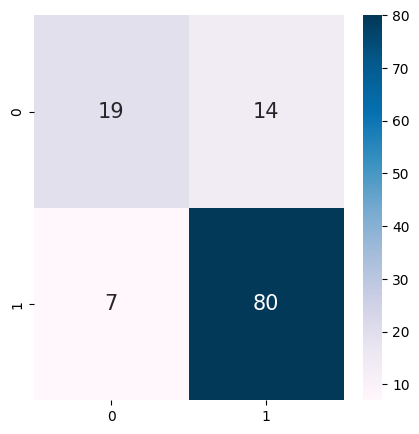

In [89]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred1)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

## **4.3** Decision Tree and Accuracy Score

In [90]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(X_train, y_train)
y_pred2 = DTclassifier.predict(X_test)

Prediction are 74.17% accurate based on the output below:

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [92]:
DTAcc = accuracy_score(y_test, y_pred2)
print('Decision Tree Accuracy: {:.2f}%'.format(DTAcc*100))

Decision Tree Accuracy: 70.83%


In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_dt = accuracy_score(y_test, y_pred2)
precision_dt = precision_score(y_test, y_pred2)
recall_dt = recall_score(y_test, y_pred2)
f1_dt = f1_score(y_test, y_pred2)

In [94]:
print('Decision Tree Accuracy: {:.2f}%'.format(accuracy_dt * 100))
print('Decision Tree Precision: {:.2f}%'.format(precision_dt* 100))
print('Decision Tree Recall: {:.2f}%'.format(recall_dt* 100))
print('Decision Tree F1-Score: {:.2f}%'.format(f1_dt* 100))

Decision Tree Accuracy: 70.83%
Decision Tree Precision: 81.71%
Decision Tree Recall: 77.01%
Decision Tree F1-Score: 79.29%


<Axes: >

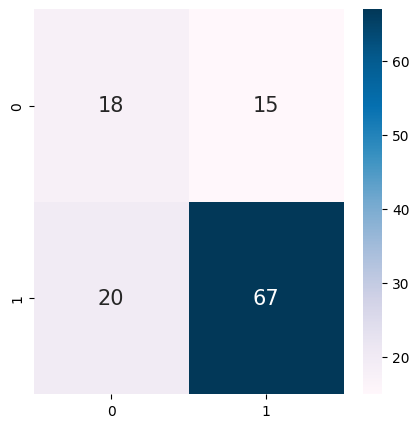

In [95]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred2)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

## **4.4** K-Nearest Neighbour (KNN) and Accuracy Score

In [96]:
from sklearn.neighbors import KNeighborsClassifier
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

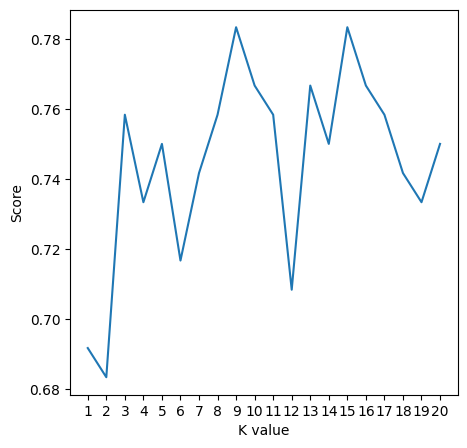

In [97]:
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

In [98]:
KNAcc = max(scoreListknn)
print("K-Nearest Neighbour(KNN) Best Accuracy: {:.2f}%".format(KNAcc*100))

K-Nearest Neighbour(KNN) Best Accuracy: 78.33%


In [99]:
best_k_index = scoreListknn.index(max(scoreListknn))  # Find the index of the maximum accuracy
best_k = best_k_index + 1  # Add 1 because index starts from 0 but k starts from 1

In [100]:
# Retrain the KNN classifier with the optimal number of neighbors to get y_pred3
KNclassifier_max = KNeighborsClassifier(n_neighbors=best_k)
KNclassifier_max.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [101]:
y_pred3 = KNclassifier_max.predict(X_test)

In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
accuracy_knn = accuracy_score(y_test, y_pred3)
precision_knn = precision_score(y_test, y_pred3)
recall_knn = recall_score(y_test, y_pred3)
f1_knn = f1_score(y_test, y_pred3)

In [103]:
print('K-Nearest Neighbour(KNN) Accuracy: {:.2f}%'.format(accuracy_knn * 100))
print('K-Nearest Neighbour(KNN) Precision: {:.2f}%'.format(precision_knn* 100))
print('K-Nearest Neighbour(KNN) Recall: {:.2f}%'.format(recall_knn* 100))
print('K-Nearest Neighbour(KNN) F1-Score: {:.2f}%'.format(f1_knn* 100))

K-Nearest Neighbour(KNN) Accuracy: 78.33%
K-Nearest Neighbour(KNN) Precision: 82.11%
K-Nearest Neighbour(KNN) Recall: 89.66%
K-Nearest Neighbour(KNN) F1-Score: 85.71%


<Axes: >

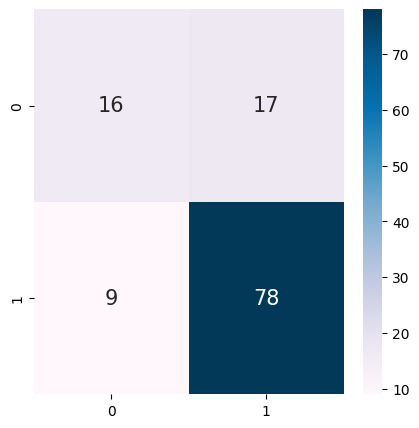

In [104]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred3)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

## **4.5** Support Vector Machine (SVM) and Accuracy Score

In [105]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred4 = SVCclassifier.predict(X_test)

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred4,y_test)
print('Support Vector Machine (SVM) Accuracy: {:.2f}%'.format(SVCAcc*100))

Support Vector Machine (SVM) Accuracy: 83.33%


In [106]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
accuracy_svc = accuracy_score(y_test, y_pred4)
precision_svc = precision_score(y_test, y_pred4)
recall_svc = recall_score(y_test, y_pred4)
f1_svc = f1_score(y_test, y_pred4)

In [107]:
print('Support Vector Machine (SVM) Accuracy: {:.2f}%'.format(accuracy_svc * 100))
print('Support Vector Machine (SVM) Precision: {:.2f}%'.format(precision_svc* 100))
print('Support Vector Machine (SVM) Recall: {:.2f}%'.format(recall_svc* 100))
print('Support Vector Machine (SVM) F1-Score: {:.2f}%'.format(f1_svc* 100))

Support Vector Machine (SVM) Accuracy: 83.33%
Support Vector Machine (SVM) Precision: 86.02%
Support Vector Machine (SVM) Recall: 91.95%
Support Vector Machine (SVM) F1-Score: 88.89%


<Axes: >

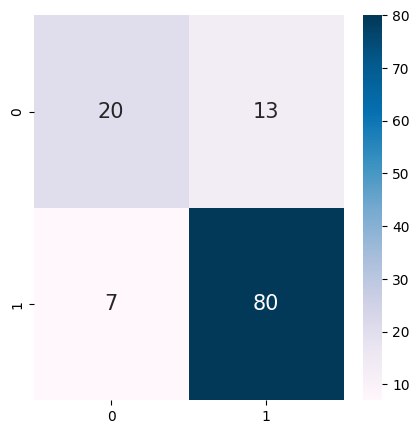

In [108]:
# Cofusion Matrix
y_pred4 = SVCclassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred4)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

## **4.6** Random Forest and Accuracy Score

In [109]:
from sklearn.ensemble import RandomForestClassifier
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

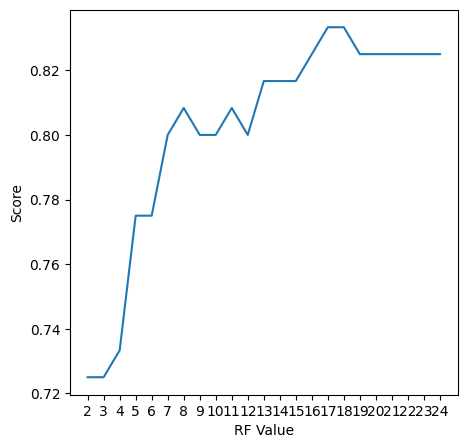

In [110]:
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()

In [111]:
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

Random Forest Accuracy:  83.33%


In [112]:
# Find the index of the maximum accuracy score
best_leaf_nodes_index = scoreListRF.index(max(scoreListRF))
# Add 2 because the loop starts from 2
best_max_leaf_nodes = best_leaf_nodes_index + 2

In [113]:
# Retrain the Random Forest classifier with the optimal max_leaf_nodes to get y_pred5
RFclassifier_max = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=best_max_leaf_nodes)
RFclassifier_max.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=17, n_estimators=1000, random_state=1)

In [114]:
y_pred5 = RFclassifier_max.predict(X_test)

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
accuracy_rf = accuracy_score(y_test, y_pred5)
precision_rf = precision_score(y_test, y_pred5)
recall_rf = recall_score(y_test, y_pred5)
f1_rf = f1_score(y_test, y_pred5)

In [116]:
print('Random Forest Accuracy: {:.2f}%'.format(accuracy_rf * 100))
print('Random Forest Precision: {:.2f}%'.format(precision_rf* 100))
print('Random Forest Recall: {:.2f}%'.format(recall_rf* 100))
print('Random Forest F1-Score: {:.2f}%'.format(f1_rf* 100))

Random Forest Accuracy: 83.33%
Random Forest Precision: 86.02%
Random Forest Recall: 91.95%
Random Forest F1-Score: 88.89%


<Axes: >

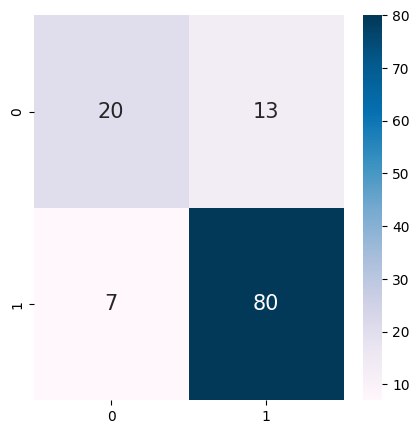

In [117]:
# Cofusion Matrix
cm = confusion_matrix(y_test, y_pred5)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

## **4.7** Naïve Bayes and Accuracy Score

### **4.7.1** Gaussian Naïve Bayes

In [118]:
from sklearn.naive_bayes import GaussianNB

In [119]:
GNBclassifier = GaussianNB()
GNBclassifier.fit(X_train, y_train)

GaussianNB()

In [120]:
y_pred6 = GNBclassifier.predict(X_test)

In [121]:
from sklearn.metrics import accuracy_score
GNBAcc = accuracy_score(y_pred6,y_test)

In [122]:
print('Gaussian Naïve Bayes Accuracy: {:.2f}%'.format(GNBAcc*100))

Gaussian Naïve Bayes Accuracy: 82.50%


In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
accuracy_gnb = accuracy_score(y_test, y_pred6)
precision_gnb = precision_score(y_test, y_pred6)
recall_gnb = recall_score(y_test, y_pred6)
f1_gnb = f1_score(y_test, y_pred6)

In [124]:
print('Gaussian Naïve Bayes Accuracy: {:.2f}%'.format(accuracy_gnb * 100))
print('Gaussian Naïve Bayes Precision: {:.2f}%'.format(precision_gnb* 100))
print('Gaussian Naïve Bayes Recall: {:.2f}%'.format(recall_gnb* 100))
print('Gaussian Naïve Bayes F1-Score: {:.2f}%'.format(f1_gnb* 100))

Gaussian Naïve Bayes Accuracy: 82.50%
Gaussian Naïve Bayes Precision: 85.87%
Gaussian Naïve Bayes Recall: 90.80%
Gaussian Naïve Bayes F1-Score: 88.27%


### **4.7.2** Multinomial Naïve Bayes

In [125]:
from sklearn.naive_bayes import MultinomialNB

In [126]:
MNBclassifier = MultinomialNB()
MNBclassifier.fit(X_train, y_train)

MultinomialNB()

In [127]:
y_pred7 = MNBclassifier.predict(X_test)

In [128]:
from sklearn.metrics import accuracy_score
MNBAcc = accuracy_score(y_pred7,y_test)
print('Multinomial Naïve Bayes Accuracy: {:.2f}%'.format(MNBAcc*100))

Multinomial Naïve Bayes Accuracy: 72.50%


In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
accuracy_mnb = accuracy_score(y_test, y_pred7)
precision_mnb = precision_score(y_test, y_pred7)
recall_mnb = recall_score(y_test, y_pred7)
f1_mnb = f1_score(y_test, y_pred7)

In [130]:
print('Multinomial Naïve Bayes Accuracy: {:.2f}%'.format(accuracy_mnb * 100))
print('Multinomial Naïve Bayes Precision: {:.2f}%'.format(precision_mnb* 100))
print('Multinomial Naïve Bayes Recall: {:.2f}%'.format(recall_mnb* 100))
print('Multinomial Naïve Bayes F1-Score: {:.2f}%'.format(f1_mnb* 100))

Multinomial Naïve Bayes Accuracy: 72.50%
Multinomial Naïve Bayes Precision: 72.50%
Multinomial Naïve Bayes Recall: 100.00%
Multinomial Naïve Bayes F1-Score: 84.06%


### **4.7.3** Bernoulli Naïve Bayes

In [131]:
from sklearn.naive_bayes import BernoulliNB

In [132]:
BNBclassifier = BernoulliNB()
BNBclassifier.fit(X_train, y_train)

BernoulliNB()

In [133]:
y_pred8 = BNBclassifier.predict(X_test)

In [134]:
from sklearn.metrics import accuracy_score
BNBAcc = accuracy_score(y_pred8,y_test)
print('Bernoulli Naïve Bayes Accuracy: {:.2f}%'.format(BNBAcc*100))

Bernoulli Naïve Bayes Accuracy: 80.83%


In [135]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
accuracy_bnb = accuracy_score(y_test, y_pred8)
precision_bnb = precision_score(y_test, y_pred8)
recall_bnb = recall_score(y_test, y_pred8)
f1_bnb = f1_score(y_test, y_pred8)

In [136]:
print('Bernoulli Naïve Bayes Accuracy: {:.2f}%'.format(accuracy_bnb * 100))
print('Bernoulli Naïve Bayes Precision: {:.2f}%'.format(precision_bnb* 100))
print('Bernoulli Naïve Bayes Recall: {:.2f}%'.format(recall_bnb* 100))
print('Bernoulli Naïve Bayes F1-Score: {:.2f}%'.format(f1_bnb* 100))

Bernoulli Naïve Bayes Accuracy: 80.83%
Bernoulli Naïve Bayes Precision: 83.33%
Bernoulli Naïve Bayes Recall: 91.95%
Bernoulli Naïve Bayes F1-Score: 87.43%


### **4.7.4** Complement Naïve Bayes

In [137]:
from sklearn.naive_bayes import ComplementNB

In [138]:
CNBclassifier = ComplementNB()
CNBclassifier.fit(X_train, y_train)

ComplementNB()

In [139]:
y_pred9 = CNBclassifier.predict(X_test)

In [140]:
from sklearn.metrics import accuracy_score
CNBAcc = accuracy_score(y_pred9,y_test)
print('Complement Naïve Bayes Accuracy: {:.2f}%'.format(CNBAcc*100))

Complement Naïve Bayes Accuracy: 57.50%


In [141]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
accuracy_cnb = accuracy_score(y_test, y_pred9)
precision_cnb = precision_score(y_test, y_pred9)
recall_cnb = recall_score(y_test, y_pred9)
f1_cnb = f1_score(y_test, y_pred9)

In [142]:
print('Complement Naïve Bayes Accuracy: {:.2f}%'.format(accuracy_cnb * 100))
print('Complement Naïve Bayes Precision: {:.2f}%'.format(precision_cnb* 100))
print('Complement Naïve Bayes Recall: {:.2f}%'.format(recall_cnb* 100))
print('Complement Naïve Bayes F1-Score: {:.2f}%'.format(f1_cnb* 100))

Complement Naïve Bayes Accuracy: 57.50%
Complement Naïve Bayes Precision: 74.32%
Complement Naïve Bayes Recall: 63.22%
Complement Naïve Bayes F1-Score: 68.32%


### **4.7.5** Categorical Naïve Bayes

In [143]:
from sklearn.naive_bayes import CategoricalNB

In [144]:
CANBclassifier = CategoricalNB()
CANBclassifier.fit(X_train, y_train)

CategoricalNB()

In [145]:
y_pred10 = CANBclassifier.predict(X_test)

In [146]:
from sklearn.metrics import accuracy_score
CANBAcc = accuracy_score(y_pred10,y_test)
print('Categorical Naïve Bayes Accuracy: {:.2f}%'.format(CANBAcc*100))

Categorical Naïve Bayes Accuracy: 77.50%


In [147]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
accuracy_canb = accuracy_score(y_test, y_pred10)
precision_canb = precision_score(y_test, y_pred10)
recall_canb = recall_score(y_test, y_pred10)
f1_canb = f1_score(y_test, y_pred10)

In [148]:
print('Categorical Naïve Bayes Accuracy: {:.2f}%'.format(accuracy_canb * 100))
print('Categorical Naïve Bayes Precision: {:.2f}%'.format(precision_canb* 100))
print('Categorical Naïve Bayes Recall: {:.2f}%'.format(recall_canb* 100))
print('Categorical Naïve Bayes F1-Score: {:.2f}%'.format(f1_canb* 100))

Categorical Naïve Bayes Accuracy: 77.50%
Categorical Naïve Bayes Precision: 79.41%
Categorical Naïve Bayes Recall: 93.10%
Categorical Naïve Bayes F1-Score: 85.71%


## **4.8** Model Comparison

In [149]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour (KNN)',
                                  'Support Vector Machine (SVM)', 'Decision Tree',
                                  'Random Forest', 'Gaussian Naïve Bayes',
                                  'Multinomial Naïve Baye', 'Bernoulli Naïve Bayes',
                                  'Complement Naïve Bayes', 'Categorical Naive Bayes'],
                        'Accuracy(%)': [accuracy_lr * 100, accuracy_knn * 100,
                                     accuracy_svc * 100, accuracy_dt * 100,
                                     accuracy_rf * 100, accuracy_gnb * 100,
                                     accuracy_mnb * 100, accuracy_bnb * 100,
                                     accuracy_cnb * 100, accuracy_canb * 100]})
compare.sort_values(by='Accuracy(%)', ascending=False)


,Model,Accuracy(%)
2,Support Vector Machine (SVM),83.333333
4,Random Forest,83.333333
0,Logistic Regression,82.500000
5,Gaussian Naïve Bayes,82.500000
7,Bernoulli Naïve Bayes,80.833333
1,K-Nearest Neighbour (KNN),78.333333
9,Categorical Naive Bayes,77.500000
6,Multinomial Naïve Baye,72.500000
3,Decision Tree,70.833333
8,Complement Naïve Bayes,57.500000


In [150]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour (KNN)',
                                  'Support Vector Machine (SVM)', 'Decision Tree',
                                  'Random Forest', 'Gaussian Naïve Bayes',
                                  'Multinomial Naïve Baye', 'Bernoulli Naïve Bayes',
                                  'Complement Naïve Bayes', 'Categorical Naive Bayes'],
                        'Accuracy': [accuracy_lr * 100, accuracy_knn * 100,
                                     accuracy_svc * 100, accuracy_dt * 100,
                                     accuracy_rf * 100, accuracy_gnb * 100,
                                     accuracy_mnb * 100, accuracy_bnb * 100,
                                     accuracy_cnb * 100, accuracy_canb * 100],
                        'Precision': [precision_lr * 100, precision_knn * 100,
                                      precision_svc * 100, precision_dt * 100,
                                      precision_rf * 100, precision_gnb * 100,
                                      precision_mnb * 100, precision_bnb * 100,
                                      precision_cnb * 100, precision_canb * 100],
                        'Recall': [recall_lr * 100, recall_knn * 100,
                                   recall_svc * 100, recall_dt * 100,
                                   recall_rf * 100, recall_gnb * 100,
                                   recall_mnb * 100, recall_bnb * 100,
                                   recall_cnb * 100, recall_canb * 100],
                        'F1-Score': [f1_lr * 100, f1_knn * 100,
                                     f1_svc * 100, f1_dt * 100,
                                     f1_rf * 100, f1_gnb * 100,
                                     f1_mnb * 100, f1_bnb * 100,
                                     f1_cnb * 100, f1_canb * 100]})
compare.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy,Precision,Recall,F1-Score
2,Support Vector Machine (SVM),83.333333,86.021505,91.954023,88.888889
4,Random Forest,83.333333,86.021505,91.954023,88.888889
0,Logistic Regression,82.500000,85.106383,91.954023,88.397790
5,Gaussian Naïve Bayes,82.500000,85.869565,90.804598,88.268156
7,Bernoulli Naïve Bayes,80.833333,83.333333,91.954023,87.431694
1,K-Nearest Neighbour (KNN),78.333333,82.105263,89.655172,85.714286
9,Categorical Naive Bayes,77.500000,79.411765,93.103448,85.714286
6,Multinomial Naïve Baye,72.500000,72.500000,100.000000,84.057971
3,Decision Tree,70.833333,81.707317,77.011494,79.289941
8,Complement Naïve Bayes,57.500000,74.324324,63.218391,68.322981


# **5.** **Feature Selections**

## Recursive feature elimination with cross-validation

In [151]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 6  # Minimum number of features to consider
clf = RandomForestClassifier(max_leaf_nodes=17, n_estimators=1000, random_state=1)  # Random Forest classifier
cv = StratifiedKFold(n_splits=5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 6


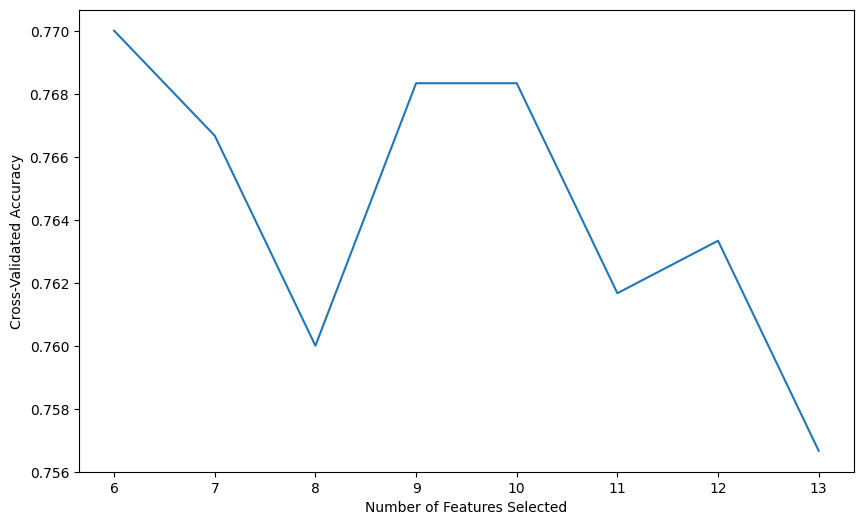

In [152]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the number of features versus cross-validated scores
plt.figure(figsize=(10, 6))
plt.xlabel("Number of Features Selected")
plt.ylabel("Cross-Validated Accuracy")
plt.plot(range(min_features_to_select, len(rfecv.cv_results_['mean_test_score']) + min_features_to_select), rfecv.cv_results_['mean_test_score'])
plt.show()


In [153]:
X=df_ml_train.drop('Loan_Status1',axis=1)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural_Area,Urban_Area,Semiurban_Area
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,0,1,0
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1,0
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1,0
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1,0


In [154]:
# Get the selected feature indices
selected_feature_indices = np.where(rfecv.support_)[0]

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected feature names
print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Semiurban_Area'],
      dtype='object')


# **6.** Model Building Part II (With Significant Features)

## **6.1** New Dataset with Significant Features

In [155]:
# Selecting the significant features
selected_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Semiurban_Area']

new_X = X[selected_features]
new_X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban_Area
0,5849,0.0,128.0,360.0,1.0,0
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,0
3,2583,2358.0,120.0,360.0,1.0,0
4,6000,0.0,141.0,360.0,1.0,0


### **6.1.1** Data Normalization

Data normalization will be performed to normalize the range of independent variables or features of data.

In [156]:
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Fit the scaler to new_X
scaler.fit(new_X)
# Transform the data
new_X = scaler.transform(new_X)

### **6.1.1** Split New Dataset

In [157]:
from sklearn.model_selection import train_test_split
# Split the data into training (80%) and testing (20%) sets
new_X_train, new_X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=42)

## **6.2** Logistic Regression and Accuracy Score

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
new_LRclassifier= LogisticRegression()
new_LRclassifier.fit(new_X_train, y_train)
LogisticRegression()

LogisticRegression()

In [159]:
new_y_pred1 = new_LRclassifier.predict(new_X_test)

In [160]:
new_LRAcc = accuracy_score(y_test,new_y_pred1)
print('Logistic Regression Accuracy: {:.2f}%'.format(new_LRAcc*100))

Logistic Regression Accuracy: 83.33%


In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
new_accuracy_lr = accuracy_score(y_test, new_y_pred1)
new_precision_lr = precision_score(y_test, new_y_pred1)
new_recall_lr = recall_score(y_test, new_y_pred1)
new_f1_lr = f1_score(y_test, new_y_pred1)

In [162]:
print('Logistic Regression Accuracy: {:.2f}%'.format(new_accuracy_lr * 100))
print('Logistic Regression Precision: {:.2f}%'.format(new_precision_lr* 100))
print('Logistic Regression Recall: {:.2f}%'.format(new_recall_lr* 100))
print('Logistic Regression F1-Score: {:.2f}%'.format(new_f1_lr* 100))

Logistic Regression Accuracy: 83.33%
Logistic Regression Precision: 86.02%
Logistic Regression Recall: 91.95%
Logistic Regression F1-Score: 88.89%


<Axes: >

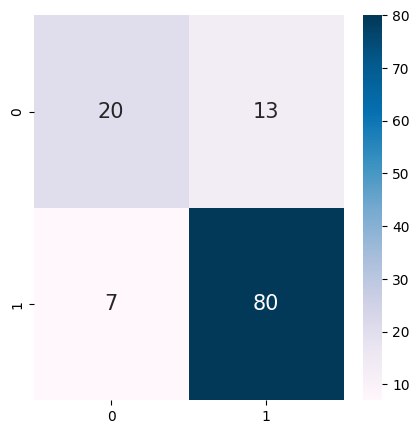

In [163]:
# Cofusion Matrix
cm = confusion_matrix(y_test, new_y_pred1)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

## **6.3** Decision Tree and Accuracy Score

In [164]:
from sklearn.tree import DecisionTreeClassifier
new_DTclassifier = DecisionTreeClassifier()
new_DTclassifier.fit(new_X_train, y_train)
new_y_pred2 = new_DTclassifier.predict(new_X_test)

In [165]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [166]:
new_DTAcc = accuracy_score(y_test, new_y_pred2)
print('Decision Tree Accuracy: {:.2f}%'.format(new_DTAcc*100))

Decision Tree Accuracy: 72.50%


In [167]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
new_accuracy_dt = accuracy_score(y_test, new_y_pred2)
new_precision_dt = precision_score(y_test, new_y_pred2)
new_recall_dt = recall_score(y_test, new_y_pred2)
new_f1_dt = f1_score(y_test, new_y_pred2)

In [168]:
print('Decision Tree Accuracy: {:.2f}%'.format(new_accuracy_dt * 100))
print('Decision Tree Precision: {:.2f}%'.format(new_precision_dt* 100))
print('Decision Tree Recall: {:.2f}%'.format(new_recall_dt* 100))
print('Decision Tree F1-Score: {:.2f}%'.format(new_f1_dt* 100))

Decision Tree Accuracy: 72.50%
Decision Tree Precision: 82.14%
Decision Tree Recall: 79.31%
Decision Tree F1-Score: 80.70%


<Axes: >

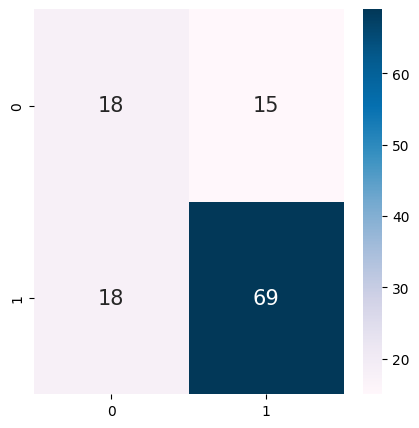

In [169]:
# Cofusion Matrix
cm = confusion_matrix(y_test, new_y_pred2)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

## **6.4** K-Nearest Neighbour (KNN) and Accuracy Score

In [170]:
from sklearn.neighbors import KNeighborsClassifier
new_scoreListknn = []
for i in range(1,21):
    new_KNclassifier = KNeighborsClassifier(n_neighbors = i)
    new_KNclassifier.fit(new_X_train, y_train)
    new_scoreListknn.append(new_KNclassifier.score(new_X_test, y_test))

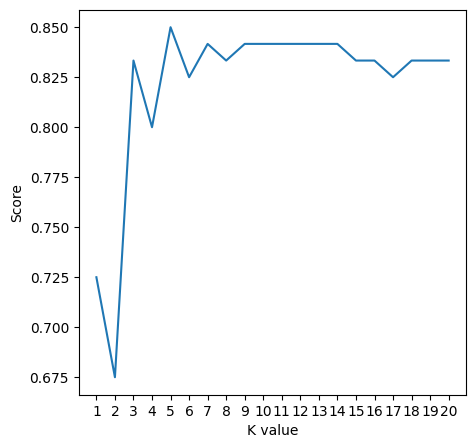

In [171]:
plt.plot(range(1,21), new_scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

In [172]:
new_KNAcc = max(new_scoreListknn)
print("K-Nearest Neighbour(KNN) Best Accuracy: {:.2f}%".format(new_KNAcc*100))

K-Nearest Neighbour(KNN) Best Accuracy: 85.00%


In [173]:
new_best_k_index = new_scoreListknn.index(max(new_scoreListknn))  # Find the index of the maximum accuracy
new_best_k = new_best_k_index + 1  # Add 1 because index starts from 0 but k starts from 1

In [174]:
# Retrain the KNN classifier with the optimal number of neighbors to get new_y_pred3
new_KNclassifier_max = KNeighborsClassifier(n_neighbors= new_best_k)
new_KNclassifier_max.fit(new_X_train, y_train)

KNeighborsClassifier()

In [175]:
new_y_pred3 = new_KNclassifier_max.predict(new_X_test)

In [176]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
new_accuracy_knn = accuracy_score(y_test, new_y_pred3)
new_precision_knn = precision_score(y_test, new_y_pred3)
new_recall_knn = recall_score(y_test, new_y_pred3)
new_f1_knn = f1_score(y_test, new_y_pred3)

In [177]:
print('K-Nearest Neighbour(KNN) Accuracy: {:.2f}%'.format(new_accuracy_knn * 100))
print('K-Nearest Neighbour(KNN) Precision: {:.2f}%'.format(new_precision_knn* 100))
print('K-Nearest Neighbour(KNN) Recall: {:.2f}%'.format(new_recall_knn* 100))
print('K-Nearest Neighbour(KNN) F1-Score: {:.2f}%'.format(new_f1_knn* 100))

K-Nearest Neighbour(KNN) Accuracy: 85.00%
K-Nearest Neighbour(KNN) Precision: 87.10%
K-Nearest Neighbour(KNN) Recall: 93.10%
K-Nearest Neighbour(KNN) F1-Score: 90.00%


<Axes: >

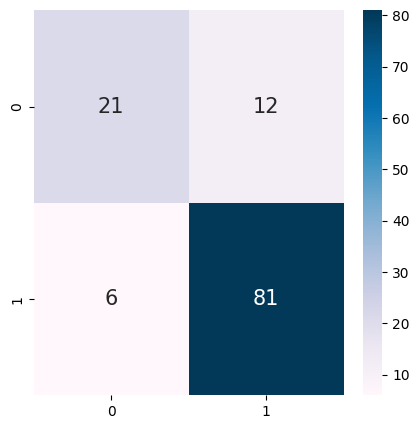

In [178]:
# Cofusion Matrix
cm = confusion_matrix(y_test, new_y_pred3)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

## **6.5** Support Vector Machine (SVM) and Accuracy Score

In [179]:
from sklearn.svm import SVC
new_SVCclassifier = SVC(kernel='rbf', max_iter=500)
new_SVCclassifier.fit(new_X_train, y_train)

SVC(max_iter=500)

In [180]:
new_y_pred4 = new_SVCclassifier.predict(new_X_test)

In [181]:
from sklearn.metrics import accuracy_score
new_SVCAcc = accuracy_score(new_y_pred4,y_test)
print('Support Vector Machine (SVM) Accuracy: {:.2f}%'.format(new_SVCAcc*100))

Support Vector Machine (SVM) Accuracy: 83.33%


In [182]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
new_accuracy_svc = accuracy_score(y_test, new_y_pred4)
new_precision_svc = precision_score(y_test, new_y_pred4)
new_recall_svc = recall_score(y_test, new_y_pred4)
new_f1_svc = f1_score(y_test, new_y_pred4)

In [183]:
print('Support Vector Machine (SVM) Accuracy: {:.2f}%'.format(new_accuracy_svc * 100))
print('Support Vector Machine (SVM) Precision: {:.2f}%'.format(new_precision_svc* 100))
print('Support Vector Machine (SVM) Recall: {:.2f}%'.format(new_recall_svc* 100))
print('Support Vector Machine (SVM) F1-Score: {:.2f}%'.format(new_f1_svc* 100))

Support Vector Machine (SVM) Accuracy: 83.33%
Support Vector Machine (SVM) Precision: 86.02%
Support Vector Machine (SVM) Recall: 91.95%
Support Vector Machine (SVM) F1-Score: 88.89%


<Axes: >

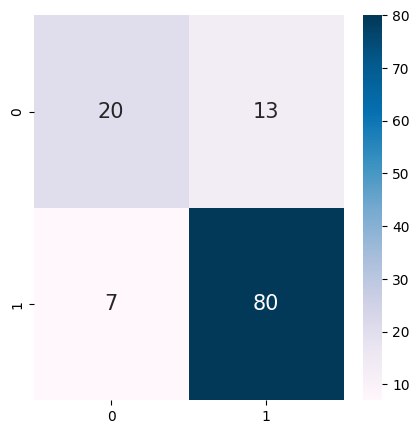

In [184]:
# Cofusion Matrix
new_y_pred4 = new_SVCclassifier.predict(new_X_test)
cm = confusion_matrix(y_test, new_y_pred4)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

## **6.6** Random Forest and Accuracy Score

In [185]:
from sklearn.ensemble import RandomForestClassifier
new_scoreListRF = []
for i in range(2,25):
    new_RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    new_RFclassifier.fit(new_X_train, y_train)
    new_scoreListRF.append(new_RFclassifier.score(new_X_test, y_test))

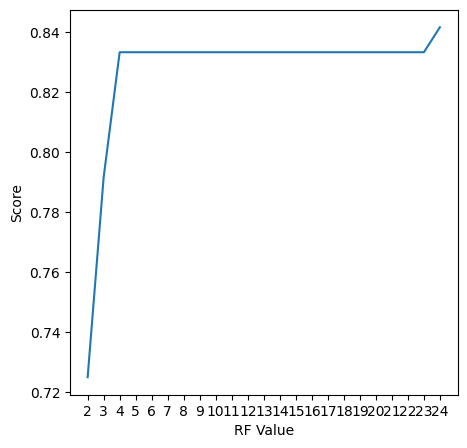

In [186]:
plt.plot(range(2,25), new_scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()

In [187]:
new_RFAcc = max(new_scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(new_RFAcc*100))

Random Forest Accuracy:  84.17%


In [188]:
# Find the index of the maximum accuracy score
new_best_leaf_nodes_index = new_scoreListRF.index(max(new_scoreListRF))
# Add 2 because the loop starts from 2
new_best_max_leaf_nodes = new_best_leaf_nodes_index + 2

In [189]:
# Retrain the Random Forest classifier with the optimal max_leaf_nodes to get y_pred5
new_RFclassifier_max = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes= new_best_max_leaf_nodes)
new_RFclassifier_max.fit(new_X_train, y_train)

RandomForestClassifier(max_leaf_nodes=24, n_estimators=1000, random_state=1)

In [190]:
new_y_pred5 = new_RFclassifier_max.predict(new_X_test)

In [191]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
new_accuracy_rf = accuracy_score(y_test, new_y_pred5)
new_precision_rf = precision_score(y_test, new_y_pred5)
new_recall_rf = recall_score(y_test, new_y_pred5)
new_f1_rf = f1_score(y_test, new_y_pred5)

In [192]:
print('Random Forest Accuracy: {:.2f}%'.format(new_accuracy_rf * 100))
print('Random Forest Precision: {:.2f}%'.format(new_precision_rf* 100))
print('Random Forest Recall: {:.2f}%'.format(new_recall_rf* 100))
print('Random Forest F1-Score: {:.2f}%'.format(new_f1_rf* 100))

Random Forest Accuracy: 84.17%
Random Forest Precision: 86.17%
Random Forest Recall: 93.10%
Random Forest F1-Score: 89.50%


<Axes: >

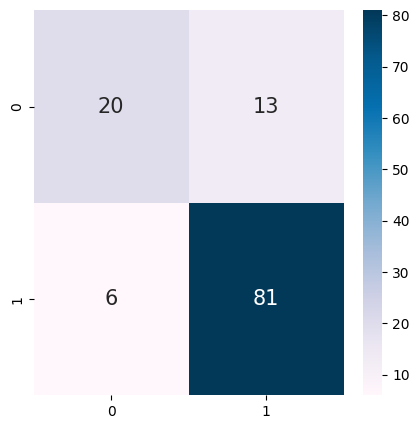

In [193]:
# Cofusion Matrix
cm = confusion_matrix(y_test, new_y_pred5)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

## **6.7** Naïve Bayes and Accuracy Score

### **6.7.1** Gaussian Naïve Bayes

In [194]:
from sklearn.naive_bayes import GaussianNB

In [195]:
new_GNBclassifier = GaussianNB()
new_GNBclassifier.fit(new_X_train, y_train)

GaussianNB()

In [196]:
new_y_pred6 = new_GNBclassifier.predict(new_X_test)

In [197]:
from sklearn.metrics import accuracy_score
new_GNBAcc = accuracy_score(new_y_pred6,y_test)
print('Gaussian Naive Bayes accuracy: {:.2f}%'.format(new_GNBAcc*100))

Gaussian Naive Bayes accuracy: 82.50%


In [198]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
new_accuracy_gnb = accuracy_score(y_test, new_y_pred6)
new_precision_gnb = precision_score(y_test, new_y_pred6)
new_recall_gnb = recall_score(y_test, new_y_pred6)
new_f1_gnb = f1_score(y_test, new_y_pred6)

In [199]:
print('Gaussian Naïve Bayes Accuracy: {:.2f}%'.format(new_accuracy_gnb * 100))
print('Gaussian Naïve Bayes Precision: {:.2f}%'.format(new_precision_gnb* 100))
print('Gaussian Naïve Bayes Recall: {:.2f}%'.format(new_recall_gnb* 100))
print('Gaussian Naïve Bayes F1-Score: {:.2f}%'.format(new_f1_gnb* 100))

Gaussian Naïve Bayes Accuracy: 82.50%
Gaussian Naïve Bayes Precision: 85.87%
Gaussian Naïve Bayes Recall: 90.80%
Gaussian Naïve Bayes F1-Score: 88.27%


### **6.7.2** Multinomial Naïve Bayes

In [200]:
from sklearn.naive_bayes import MultinomialNB

In [201]:
new_MNBclassifier = MultinomialNB()
new_MNBclassifier.fit(new_X_train, y_train)

MultinomialNB()

In [202]:
new_y_pred7 = new_MNBclassifier.predict(new_X_test)

In [203]:
from sklearn.metrics import accuracy_score
new_MNBAcc = accuracy_score(new_y_pred7,y_test)
print('Multinomial Naive Bayes accuracy: {:.2f}%'.format(new_MNBAcc*100))

Multinomial Naive Bayes accuracy: 72.50%


In [204]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
new_accuracy_mnb = accuracy_score(y_test, new_y_pred7)
new_precision_mnb = precision_score(y_test, new_y_pred7)
new_recall_mnb = recall_score(y_test, new_y_pred7)
new_f1_mnb = f1_score(y_test, new_y_pred7)

In [205]:
print('Multinomial Naïve Bayes Accuracy: {:.2f}%'.format(new_accuracy_mnb * 100))
print('Multinomial Naïve Bayes Precision: {:.2f}%'.format(new_precision_mnb* 100))
print('Multinomial Naïve Bayes Recall: {:.2f}%'.format(new_recall_mnb* 100))
print('Multinomial Naïve Bayes F1-Score: {:.2f}%'.format(new_f1_mnb* 100))

Multinomial Naïve Bayes Accuracy: 72.50%
Multinomial Naïve Bayes Precision: 72.50%
Multinomial Naïve Bayes Recall: 100.00%
Multinomial Naïve Bayes F1-Score: 84.06%


### **6.7.3** Bernoulli Naïve Bayes

In [206]:
from sklearn.naive_bayes import BernoulliNB

In [207]:
new_BNBclassifier = BernoulliNB()
new_BNBclassifier.fit(new_X_train, y_train)

BernoulliNB()

In [208]:
new_y_pred8 = new_BNBclassifier.predict(new_X_test)

In [209]:
from sklearn.metrics import accuracy_score
new_BNBAcc = accuracy_score(new_y_pred8,y_test)
print('Bernoulli Naive Bayes accuracy: {:.2f}%'.format(new_BNBAcc*100))

Bernoulli Naive Bayes accuracy: 83.33%


In [210]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
new_accuracy_bnb = accuracy_score(y_test, new_y_pred8)
new_precision_bnb = precision_score(y_test, new_y_pred8)
new_recall_bnb = recall_score(y_test, new_y_pred8)
new_f1_bnb = f1_score(y_test, new_y_pred8)

In [211]:
print('Bernoulli Naïve Bayes Accuracy: {:.2f}%'.format(new_accuracy_bnb * 100))
print('Bernoulli Naïve Bayes Precision: {:.2f}%'.format(new_precision_bnb* 100))
print('Bernoulli Naïve Bayes Recall: {:.2f}%'.format(new_recall_bnb* 100))
print('Bernoulli Naïve Bayes F1-Score: {:.2f}%'.format(new_f1_bnb* 100))

Bernoulli Naïve Bayes Accuracy: 83.33%
Bernoulli Naïve Bayes Precision: 86.02%
Bernoulli Naïve Bayes Recall: 91.95%
Bernoulli Naïve Bayes F1-Score: 88.89%


### **6.7.4** Complement Naïve Bayes

In [212]:
from sklearn.naive_bayes import ComplementNB

In [213]:
new_CNBclassifier = ComplementNB()
new_CNBclassifier.fit(new_X_train, y_train)

ComplementNB()

In [214]:
new_y_pred9 = new_CNBclassifier.predict(new_X_test)

In [215]:
from sklearn.metrics import accuracy_score
new_CNBAcc = accuracy_score(new_y_pred9,y_test)
print('Complement Naive Bayes accuracy: {:.2f}%'.format(new_CNBAcc*100))

Complement Naive Bayes accuracy: 72.50%


In [216]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
new_accuracy_cnb = accuracy_score(y_test, new_y_pred9)
new_precision_cnb = precision_score(y_test, new_y_pred9)
new_recall_cnb = recall_score(y_test, new_y_pred9)
new_f1_cnb = f1_score(y_test, new_y_pred9)

In [217]:
print('Complement Naïve Bayes Accuracy: {:.2f}%'.format(new_accuracy_cnb * 100))
print('Complement Naïve Bayes Precision: {:.2f}%'.format(new_precision_cnb* 100))
print('Complement Naïve Bayes Recall: {:.2f}%'.format(new_recall_cnb* 100))
print('Complement Naïve Bayes F1-Score: {:.2f}%'.format(new_f1_cnb* 100))

Complement Naïve Bayes Accuracy: 72.50%
Complement Naïve Bayes Precision: 81.40%
Complement Naïve Bayes Recall: 80.46%
Complement Naïve Bayes F1-Score: 80.92%


### **6.7.5** Categorical Naïve Bayes

In [218]:
from sklearn.naive_bayes import CategoricalNB

In [219]:
new_CANBclassifier = CategoricalNB()
new_CANBclassifier.fit(new_X_train, y_train)

CategoricalNB()

In [220]:
new_y_pred10 = new_CANBclassifier.predict(new_X_test)

In [221]:
from sklearn.metrics import accuracy_score
new_CANBAcc = accuracy_score(new_y_pred10,y_test)
print('Categorical Naive Bayes accuracy: {:.2f}%'.format(new_CANBAcc*100))

Categorical Naive Bayes accuracy: 83.33%


In [222]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, precision, recall, and F1-score
new_accuracy_canb = accuracy_score(y_test, new_y_pred10)
new_precision_canb = precision_score(y_test, new_y_pred10)
new_recall_canb = recall_score(y_test, new_y_pred10)
new_f1_canb = f1_score(y_test, new_y_pred10)

In [223]:
print('Categorical Naïve Bayes Accuracy: {:.2f}%'.format(new_accuracy_canb * 100))
print('Categorical Naïve Bayes Precision: {:.2f}%'.format(new_precision_canb* 100))
print('Categorical Naïve Bayes Recall: {:.2f}%'.format(new_recall_canb* 100))
print('Categorical Naïve Bayes F1-Score: {:.2f}%'.format(new_f1_canb* 100))

Categorical Naïve Bayes Accuracy: 83.33%
Categorical Naïve Bayes Precision: 86.02%
Categorical Naïve Bayes Recall: 91.95%
Categorical Naïve Bayes F1-Score: 88.89%


## **6.8** Model Comparison

In [224]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour (KNN)',
                                  'Support Vector Machine (SVM)', 'Decision Tree',
                                  'Random Forest', 'Gaussian Naïve Bayes',
                                  'Multinomial Naïve Baye', 'Bernoulli Naïve Bayes',
                                  'Complement Naïve Bayes', 'Categorical Naïve Baye'],
                        'Accuracy(%)': [new_accuracy_lr * 100, new_accuracy_knn * 100,
                                     new_accuracy_svc * 100, new_accuracy_dt * 100,
                                     new_accuracy_rf * 100, new_accuracy_gnb * 100,
                                     new_accuracy_mnb * 100, new_accuracy_bnb * 100,
                                     new_accuracy_cnb * 100, new_accuracy_canb * 100]})
compare.sort_values(by='Accuracy(%)', ascending=False)

,Model,Accuracy(%)
1,K-Nearest Neighbour (KNN),85.000000
4,Random Forest,84.166667
0,Logistic Regression,83.333333
2,Support Vector Machine (SVM),83.333333
7,Bernoulli Naïve Bayes,83.333333
9,Categorical Naïve Baye,83.333333
5,Gaussian Naïve Bayes,82.500000
3,Decision Tree,72.500000
6,Multinomial Naïve Baye,72.500000
8,Complement Naïve Bayes,72.500000


In [225]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour (KNN)',
                                  'Support Vector Machine (SVM)', 'Decision Tree',
                                  'Random Forest', 'Gaussian Naïve Bayes',
                                  'Multinomial Naïve Baye', 'Bernoulli Naïve Bayes',
                                  'Complement Naïve Bayes', 'Categorical Naïve Baye'],
                        'Accuracy': [new_accuracy_lr * 100, new_accuracy_knn * 100,
                                     new_accuracy_svc * 100, new_accuracy_dt * 100,
                                     new_accuracy_rf * 100, new_accuracy_gnb * 100,
                                     new_accuracy_mnb * 100, new_accuracy_bnb * 100,
                                     new_accuracy_cnb * 100, new_accuracy_canb * 100],
                        'Precision': [new_precision_lr * 100, new_precision_knn * 100,
                                      new_precision_svc * 100, new_precision_dt * 100,
                                      new_precision_rf * 100, new_precision_gnb * 100,
                                      new_precision_mnb * 100, precision_bnb * 100,
                                      new_precision_cnb * 100, new_precision_canb * 100],
                        'Recall': [new_recall_lr * 100, new_recall_knn * 100,
                                   new_recall_svc * 100, new_recall_dt * 100,
                                   new_recall_rf * 100, new_recall_gnb * 100,
                                   new_recall_mnb * 100, new_recall_bnb * 100,
                                   new_recall_cnb * 100, new_recall_canb * 100],
                        'F1-Score': [new_f1_lr * 100, new_f1_knn * 100,
                                     new_f1_svc * 100, new_f1_dt * 100,
                                     new_f1_rf * 100, new_f1_gnb * 100,
                                     new_f1_mnb * 100, new_f1_bnb * 100,
                                     new_f1_cnb * 100, new_f1_canb * 100]})
compare.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy,Precision,Recall,F1-Score
1,K-Nearest Neighbour (KNN),85.000000,87.096774,93.103448,90.000000
4,Random Forest,84.166667,86.170213,93.103448,89.502762
0,Logistic Regression,83.333333,86.021505,91.954023,88.888889
2,Support Vector Machine (SVM),83.333333,86.021505,91.954023,88.888889
7,Bernoulli Naïve Bayes,83.333333,83.333333,91.954023,88.888889
9,Categorical Naïve Baye,83.333333,86.021505,91.954023,88.888889
5,Gaussian Naïve Bayes,82.500000,85.869565,90.804598,88.268156
3,Decision Tree,72.500000,82.142857,79.310345,80.701754
6,Multinomial Naïve Baye,72.500000,72.500000,100.000000,84.057971
8,Complement Naïve Bayes,72.500000,81.395349,80.459770,80.924855


## **7.** Model Testing

In [226]:
import joblib

In [227]:
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust the number of neighbors as needed

knn.fit(new_X_train, y_train)
# Save the model
joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']

In [228]:
loan_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [229]:
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)
loan_test['Self_Employed'].fillna(loan_test['Self_Employed'].mode()[0], inplace=True)
loan_test['Credit_History'].fillna(0, inplace=True)
loan_test['Loan_Amount_Term'].value_counts()



360.0    311
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [230]:
loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].mode()[0], inplace=True)

In [231]:
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].median(), inplace=True)

In [232]:
loan_test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [233]:
loan_test.Gender =loan_test.Gender.replace({"Male": 1, "Female" : 0})
loan_test.Education =loan_test.Education.replace({'Graduate':1,'Not Graduate':0})

loan_test.Married = loan_test.Married.replace({"Yes": 1, "No" : 0})
loan_test.Dependents = loan_test.Dependents.replace({'0':0,'1':1,'2':2,'3+':3})

loan_test.Self_Employed = loan_test.Self_Employed.replace({"Yes": 1, "No" : 0})

loan_test["Rural_Area"]= loan_test["Property_Area"].map(Rural_map)
loan_test["Urban_Area"]= loan_test["Property_Area"].map(Urban_map)
loan_test["Semiurban_Area"]= loan_test["Property_Area"].map(Semiurban_map)


In [234]:
loan_test.drop(['Loan_ID'],inplace=True,axis=1)
loan_test.drop(['Property_Area'],inplace=True,axis=1)
loan_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Rural_Area,Urban_Area,Semiurban_Area
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,0,1,0
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,0,1,0
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,0,1,0
3,1,1,2,1,0,2340,2546,100.0,360.0,0.0,0,1,0
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,0,1,4009,1777,113.0,360.0,1.0,0,1,0
363,1,1,0,1,0,4158,709,115.0,360.0,1.0,0,1,0
364,1,0,0,1,0,3250,1993,126.0,360.0,0.0,0,0,1
365,1,1,0,1,0,5000,2393,158.0,360.0,1.0,1,0,0


In [235]:
# Selecting the significant features
selected_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Semiurban_Area']

test_X = loan_test[selected_features]
test_X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban_Area
0,5720,0,110.0,360.0,1.0,0
1,3076,1500,126.0,360.0,1.0,0
2,5000,1800,208.0,360.0,1.0,0
3,2340,2546,100.0,360.0,0.0,0
4,3276,0,78.0,360.0,1.0,0


In [236]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Fit the scaler to new_X
scaler.fit(test_X)
# Transform the data
test_X = scaler.transform(test_X)

In [237]:
test_X.shape

(367, 6)

In [238]:
# Load the saved model
knn_model = joblib.load('knn_model.pkl')

# Make predictions
predictions = knn_model.predict(test_X)


print(predictions)

[0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1
 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1
 1 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1
 1 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1
 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0
 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1
 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1
 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1]


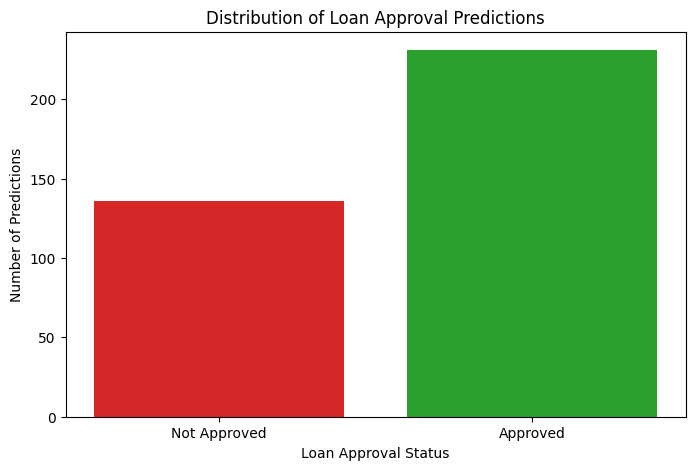

In [239]:
# Count the occurrences of each category
unique, counts = np.unique(predictions, return_counts=True)
predictions_count = dict(zip(unique, counts))

# Create labels from the unique categories
labels = ['Not Approved' if x == 0 else 'Approved' for x in unique]

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(labels, counts, color = ['tab:red', 'tab:green'] )
plt.xlabel('Loan Approval Status')
plt.ylabel('Number of Predictions')
plt.title('Distribution of Loan Approval Predictions')
plt.show()

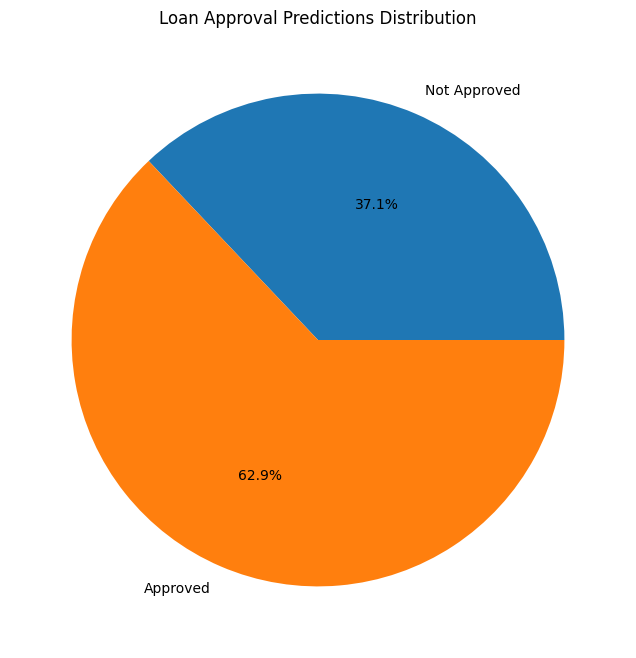

In [240]:
# For a pie chart
prediction_counts = dict(zip(unique, counts))
plt.figure(figsize=(8, 8))
plt.pie(prediction_counts.values(), labels=['Not Approved', 'Approved'], autopct='%1.1f%%')
plt.title('Loan Approval Predictions Distribution')
plt.show()